In [ ]:
from notebooks import *
print_sys_info()

/Users/danb/miniconda3/envs/bubo-features/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


The potoo.default_magic_magic extension is already loaded. To reload it, use:
  %reload_ext potoo.default_magic_magic
platform:
  machine: x86_64
  node: Dan-B.local
  processor: i386
  release: 15.6.0
  system: Darwin
  version: 'Darwin Kernel Version 15.6.0: Thu Jun 23 18:25:34 PDT 2016; root:xnu-3248.60.10~1/RELEASE_X86_64'
cpu: 8
mem: 16g
swap: 14g

In [ ]:
# Load model
#   - Chosen via notebooks/20180629_eval.ipynb (local runs) -> Train/test scores
search = Search.load_v0(

    # 'eval-na-dan170',
    #     'split_i=0,train=2693,test=674,classes=170', 'n_species=170,n_recs=1.0',
    #         'cls=logreg_ovr,solver=liblinear,C=0.1,class_weight=balanced',  # Not std
    #         'cls=std-sgdlog,alpha=0.1,class_weight=balanced',  # std [Re-run locally to get an n_species=170]

    'comp-l1-l2-na-ca',

        # 'split_i=0,train=28164,test=7042,classes=331', 'n_species=9,n_recs=1.0',
        #     'cls=logreg_ovr,solver=liblinear,C=1,class_weight=balanced',
        #     'cls=logreg_ovr_l1,solver=liblinear,C=1,class_weight=balanced',
        #     'cls=ovr-logreg_ovr,solver=liblinear,C=1,class_weight=balanced',
        #     'cls=ovr-logreg_ovr_l1,solver=liblinear,C=1,class_weight=balanced',

        # 'split_i=0,train=28164,test=7042,classes=331', 'n_species=82,n_recs=1.0',
        #     'cls=logreg_ovr,solver=liblinear,C=0.1,class_weight=balanced',
        #     'cls=logreg_ovr_l1,solver=liblinear,C=0.3,class_weight=balanced',
        #     'cls=ovr-logreg_ovr,solver=liblinear,C=0.01,class_weight=balanced',
        #     'cls=ovr-logreg_ovr_l1,solver=liblinear,C=0.1,class_weight=balanced',

        # 'split_i=0,train=28164,test=7042,classes=331', 'n_species=331,n_recs=1.0',
        #     'cls=ovr-logreg_ovr,solver=liblinear,C=0.01,class_weight=balanced',
        #     'cls=ovr-logreg_ovr_l1,solver=liblinear,C=0.001,class_weight=balanced',

        'split_i=0,train=34875,test=331,classes=331', 'n_species=331,n_recs=1.0',
            'cls=ovr-logreg_ovr,solver=liblinear,C=0.001,class_weight=balanced',

    fix_missing_skm_projection_id='peterson-v0-26bae1c',

)
projection = search.projection
features = projection.features
load = features.load
display(
    search,
    search.classifier_,
    len(search.classifier_.classes_),
)

[22:08:55.418] DEBUG  Projection.load

  path: /Users/danb/hack/bubo/features/data/models/projection/peterson-v0-26bae1c.pkl

Search(
  n_species=331,
  n_recs=1.0,
  classifier='cls: ovr-logreg_ovr,solver: liblinear,C: 0.001,class_weight: balanced',
  random_state=0,
  projection=Projection(
    features=Features(
      load=Load(channels=1, sample_rate=22050, sample_width_bit=16, cache_audio=True),
      sample_rate=22050,
      f_min=1000,
      f_bins=40,
      hop_length=256,
      frame_length=512,
      frame_window='hann',
      patch_length=4
    ),
    skm_fit_max_t=600000,
    k=500,
    variance_explained=0.99,
    do_pca=True,
    pca_whiten=True,
    standardize=False,
    normalize=False,
    agg_funs=['mean', 'std', 'max']
  )
)

OneVsRestClassifier(estimator=LogisticRegression(C=0.001, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
          n_jobs=45)

331

# Load user recs

In [ ]:
user_recs = load_app_recs(projection,
    # n=10,
)
display(
    df_summary(user_recs).T,
    df_value_counts(user_recs, dropna=False),
    user_recs[:10],
)

[22:08:55.513] DEBUG  Load.audio:in

  len(recs): 169

  len(recs) per dataset: {recordings: 169}

audio: [

] |   0% Completed |  0.0s

audio: [

] |   0% Completed |  0.1s

audio: [

] |   0% Completed |  0.6s

audio: [

####################                                                                 

] |  23% Completed |  1.4s

audio: [

#####################################################################################

] | 100% Completed |  1.6s

[22:08:57.156] DEBUG  Load.audio:out

  len(audio): 169

[22:08:58.578] WARN   Dropped 1 recs with duplicate audio_id

recorded_at     dataset species species_com_name species_query  duration_s  samples_mb  samples_n                                          basename      species_longhand                                 audio_sha                                                           id                                                             path                                                                                                                          audio                                                                                                                                                                                                     feat
audio_id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
20171007-c6f4 2017-10-07 15:18:04  recordings    BEWR    Bewick's Wren          BEWR      30.334       1.276     668860  BEWR Bewicks Wren 2 (Coyote Hills parking lot) 2  Bewick's Wren - BEWR  c6f4dae698ffb4a89fc86f16534acc42cd22ffa9  recordings/BEWR Bewicks Wren 2 (Coyote Hills parking lot) 2  recordings/BEWR Bewicks Wren 2 (Coyote Hills parking lot) 2.wav  box(unbox=recordings/BEWR Bewicks Wren 2 (Coyote Hills parking lot) 2: 1 channels, 16 bit, sampled @ 22.05 kHz, 30.334s long)  [0.04982862872651104, -0.009262523022536485, -0.05601014071033051, -0.033796207114706045, 0.019455693498256637, 0.09370623318547609, 0.028124866154280122, -0.01782948926585037, 0.08780507033291175...
20171007-c6f4 2017-10-07 15:18:04  recordings    BEWR    Bewick's Wren          BEWR      30.334       1.276     668860    BEWR Bewicks Wren 2 (Coyote Hills parking lot)  Bewick's Wren - BEWR  c6f4dae698ffb4a89fc86f16534acc42cd22ffa9    recordings/BEWR Bewicks Wren 2 (Coyote Hills parking lot)    recordings/BEWR Bewicks Wren 2 (Coyote Hills parking lot).wav    box(unbox=recordings/BEWR Bewicks Wren 2 (Coyote Hills parking lot): 1 channels, 16 bit, sampled @ 22.05 kHz, 30.334s long)  [0.04982862872651104, -0.009262523022536485, -0.05601014071033051, -0.033796207114706045, 0.019455693498256637, 0.09370623318547609, 0.028124866154280122, -0.01782948926585037, 0.08780507033291175...

[22:08:58.635] DEBUG  Features.spectros:in

  len(recs): 168

  len(recs) per dataset: {recordings: 168}

  sum(duration_h): 3.4

  sum(samples_mb): 514.0

  sum(samples_n): 269716306

spectro: [

] |   0% Completed |  0.0s

spectro: [

###                                                                                

] |   4% Completed |  0.1s

spectro: [

#######################                                                            

] |  27% Completed |  0.2s

spectro: [

#######################################                                            

] |  47% Completed |  0.4s

spectro: [

#############################################                                      

] |  54% Completed |  0.5s

spectro: [

#####################################################                              

] |  64% Completed |  0.6s

spectro: [

##########################################################                         

] |  70% Completed |  0.7s

spectro: [

#############################################################                      

] |  73% Completed |  0.8s

spectro: [

#################################################################                  

] |  79% Completed |  0.9s

spectro: [

###################################################################################

] | 100% Completed |  1.0s

[22:08:59.724] DEBUG  Features.spectros:out

  (f, sum(t)): [40, 1053337]

min                                       25%                                                                                                              50%                                                                                                75%                                                                max
                 dtype          sizeof    len count nunique mean std                                                                                                                                                                                                                                                                                                                                                                           
audio_id         object         11760     168 168   168.0   NaN  NaN                             20160709-1e8c                             20160910-827a                                                                                                    20171007-c6f4                                                                                      20180519-486a                                                      20180826-e354
recorded_at      datetime64[ns] 1344      168 168   168.0   NaN  NaN                       2016-07-09 18:38:51                       2016-09-10 21:58:34                                                                                              2017-10-07 15:20:39                                                                                2018-05-19 06:39:18                                                2018-08-26 17:08:16
dataset          object         11256     168 168   1.0     NaN  NaN                                recordings                                recordings                                                                                                       recordings                                                                                         recordings                                                         recordings
species          object         10248     168 168   35.0    NaN  NaN                                      AMBI                                      RTHA                                                                                                             _UNK                                                                                               _UNK                                                               _UNK
species_com_name object         11258     168 168   35.0    NaN  NaN                          American Bittern                           Red-tailed Hawk                                                                                                          Unknown                                                                                            Unknown                                                   Wilson's Warbler
species_query    object         10248     168 168   35.0    NaN  NaN                                      AMBI                                      RTHA                                                                                                             _UNK                                                                                               _UNK                                                               _UNK
duration_s       float64        1344      168 168   163.0   NaN  NaN                                      2.75                                      19.3                                                                                                             50.9                                                                                               90.8                                                                691
samples_mb       float64        1344      168 168   163.0   NaN  NaN                                     0.115                                      0.81                                                                   

dataset    n species    n        species_com_name    n species_query    n  duration_s  n  samples_mb  n  samples_n  n               species_longhand    n
0  recordings  168    _UNK  108                 Unknown  108          _UNK  108       3.849  2       0.166  2      84480  2                 Unknown - _UNK  108
1                     RTHA    4            Common Raven    4          RTHA    4       4.940  2       0.208  2     108928  2         Red-tailed Hawk - RTHA    4
2                     CORA    4         Red-tailed Hawk    4          CORA    4       3.831  2       0.162  2      86784  2            Common Raven - CORA    4
3                     WIWA    3   White-crowned Sparrow    3          WIWA    3       3.936  2       0.297  2     155776  2            Song Sparrow - SOSP    3
4                     WCSP    3          Spotted Towhee    3          WCSP    3       7.065  2       0.161  2      84864  2        Wilson's Warbler - WIWA    3
5                     OCWA    3            Song Sparrow    3          OCWA    3     162.181  1       0.147  1     224562  1           Bewick's Wren - BEWR    3
6                     BEWR    3           Bewick's Wren    3          BEWR    3      29.782  1       0.247  1     199168  1   White-crowned Sparrow - WCSP    3
7                     SOSP    3        Wilson's Warbler    3          SOSP    3      56.436  1       0.185  1    2044677  1          Spotted Towhee - SPTO    3
8                     SPTO    3  Orange-crowned Warbler    3          SPTO    3      88.179  1       0.159  1      95232  1  Orange-crowned Warbler - OCWA    3
9                     BLPH    2        Hairy Woodpecker    2          BLPH    2      59.873  1       5.799  1    2766599  1        American Bittern - AMBI    2

recorded_at     dataset species       species_com_name species_query  duration_s  samples_mb  samples_n                     basename              species_longhand                                 audio_sha                                      id                                        path                                                                                                     audio                                                                                                                                                                                                     feat                                      spectro
audio_id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
20160709-1e8c 2016-07-09 19:04:03  recordings    CALT      California Towhee          CALT      43.163       1.815     951746              CALT cal towhee      California Towhee - CALT  1e8c9cfe8f48560aa30173bb9f20aee30e7ecd71              recordings/CALT cal towhee              recordings/CALT cal towhee.wav              box(unbox=recordings/CALT cal towhee: 1 channels, 16 bit, sampled @ 22.05 kHz, 43.163s long)  [0.0020352079225506017, 0.06528698559678905, 0.2609264285254609, -0.089195951772062, 0.07727329372708704, 0.2055373736714872, 0.027698790526934927, -0.05686283193105313, 0.46253264155419255, -0.04...  <features.Melspectro object at 0x140eeb860>
20160709-228d 2016-07-09 20:51:51  recordings    RTHA        Red-tailed Hawk          RTHA      42.129       1.772     928934  RTHA red tailed hawk, noise        Red-tailed Hawk - RTHA  228d2414340927d1c8193963959bb82a6681e6db  recordings/RTHA red tailed hawk, noise  recordings/RTHA red tailed hawk, noise.wav  box(unbox=recordings/RTHA red tailed hawk, noise: 1 channels, 16 bit, sampled @ 22.05 kHz, 42.129s long)  [0.145155562374502, -0.03291594158026779, 0.6948215556928247, -0.02057457093694022, -0.012508216810960069, -0.0257572814943158, 0.047407833348726454, -0.4144711092578225, 0.16210969172531198, -0.1...  <features.Melspectro object at 0x140eac908>
20160709-4bb7 2016-07-09 19:57:52  recordings    _UNK                Unknown          _UNK      59.873       2.518    1320202               Recording 0019                Unknown - _UNK  4bb7924a5092f24d2fede40c339479b1befb6ac0               recordings/Recording 0019               recordings/Recording 0019.wav               box(unbox=recordings/Recording 0019: 1 channels, 16 bit, sampled @ 22.05 kHz, 59.873s long)  [0.04732768673964517, 0.024853596750294738, 0.10414962485877463, -0.026788348157041463, 0.020007203725340497, 0.00301138290625353, 0.0935251246668493, -0.019860986898859644, 0.09155036314875556, -...  <features.Melspectro object at 0x140eac8d0>
20160709-4e73 2016-07-09 19:07:43  recordings    WCSP  White-crowned Sparrow          WCSP      21.946       0.923     483910           WCSP white crowned  White-crowned Sparrow - WCSP  4e73e2c74b271647b5406c5784b8af1fd609b8eb           recordings/WCSP white crowned           recordings/WCSP white crowned.wav           box(unbox=recordings/WCSP white crowned: 1 channels, 16 bit, sampled @ 22.05 kHz, 21.946s long)  [0.02455432420366396, -0.010616199451632655, 0.9811014987384118, -0.09298833539606761, 0.04944971635990904, -0.055971077887829235, 0.05668874577302366, -0.2278753850058666, 0.4158815614703152, -0....  <features.Melspectro object at 0x140ea0940>
20160709-59d3 2016-07-09 18:53:03  recording

# Load xc recs

In [ ]:
# Load xc_recs
#   1. countries: Filter recs to these countries
#   2. species: Filter recs to these species
#   3. recs_at_least: Filter species to those with at least this many recs
#   4. num_species: Sample this many of the species
#   5. num_recs: Sample this many recs per species
inf = np.inf
# countries_k, com_names_k = 'na', 'us'      # 9.4k/400k -> 1.1k/60k -> 774/53k
# countries_k, com_names_k = 'na', 'ca'      # 9.4k/400k -> 1.1k/60k -> 334/35k
# countries_k, com_names_k = 'na', 'dan170'  # 9.4k/400k -> 1.1k/60k -> 170/3.4k
# countries_k, com_names_k = 'na', 'dan4'    # 9.4k/400k -> 1.1k/60k ->   4/2.2k (BEWR, HOWR, SOSP, SPTO)
countries_k, com_names_k = 'na', 'dan5'    # 9.4k/400k -> 1.1k/60k ->   5/2.3k (BEWR, HOWR, SOSP, SPTO, PSFL)
recs_at_least, num_species, num_recs =   0, inf, inf  # US[334/35k ->1.1k/60k -> 774/53k -> 774/53k   -> 743/53k]    # All US
# recs_at_least, num_species, num_recs = 100, 100, 100  # CA[334/35k -> 127/25k -> 100/21k -> 100/10k   -> 100/10k]
# recs_at_least, num_species, num_recs =  50, 100, 100  # CA[334/35k -> 224/32k -> 100/16k -> 100/ 9.0k -> 100/ 9.0k]
# recs_at_least, num_species, num_recs =   0, 100, 100  # CA[334/35k -> 334/35k -> 100/12k -> 100/ 6.8k ->  99/ 6.8k]
# recs_at_least, num_species, num_recs =   0, 168, 100  # CA[334/34k -> 334/34k -> 168/18k -> 168/11k   -> 167/11k]
# recs_at_least, num_species, num_recs =   0, 168,  20  # CA[334/34k -> 334/35k -> 168/18k -> 168/ 3.2k -> 167/ 3.2k]
# recs_at_least, num_species, num_recs =  20, 168,  20  # CA[334/35k -> 296/35k -> 168/20k -> 168/ 3.4k -> 168/ 3.4k]
# recs_at_least, num_species, num_recs =   0, inf,  20  # dan170 for app_brainstorm_1
# recs_at_least, num_species, num_recs =  20, 50,    5  # Faster dev
xc_recs, recs_stats = load_xc_recs(projection, countries_k, com_names_k, recs_at_least, num_species, num_recs)

[22:09:00.352] INFO   [1/3 fast] Filtering xc.metadata...

  countries_k: na

  com_names_k: dan5

  recs_at_least: 0

  num_species: .inf

  num_recs: .inf

all              9442/399859 (sp/recs)

countries         1148/59713 (sp/recs)

species               5/2340 (sp/recs)

(downloaded)          5/2340 (sp/recs)

recs_at_least         5/2340 (sp/recs)

num_species           5/2340 (sp/recs)

num_recs              5/2340 (sp/recs)

recs ≥ 2              5/2340 (sp/recs)

[22:09:06.482] INFO   [2/3 slower] Loading xc.metadata -> xc_raw_recs (.audio, more metadata)...

[22:09:07.234] INFO   Inspect xc_raw_recs

min                                                     25%                                                                                                                                                                                                      50%                                                                                                                                                                                              75%                                        max
                         dtype          sizeof len  count nunique mean       std                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
xc_id                    int64          18720  2340 2340  2340.0   2.095e+05 1.086e+05                                                        1211                                                  126762                                                                                                                                                                                                   179087                                                                                                                                                                                           309650                                     417352
dataset                  object         138060 2340 2340  1.0     NaN        NaN                                                                xc                                                      xc                                                                                                                                                                                                       xc                                                                                                                                                                                               xc                                         xc
species                  category       2805   2340 2340  5.0     NaN        NaN                                                              PSFL                                                    HOWR                                                                                                                                                                                                     BEWR                                                                                                                                                                                             SOSP                                       SPTO
species_com_name         category       2858   2340 2340  5.0     NaN        NaN                                          Pacific-slope Flycatcher                                              House Wren                                                                                                                                                                                            Bewick's Wren                                                                                                                                                                                     Song Sparrow                             Spotted Towhee
species_query            object         142740 2340 2340  5.0     NaN        NaN                                                              BEWR                                                    HOWR                                                                                                     

species    n                 subspecies     n        country         n                            state    n   quality    n                                  type     n (duration_s//30)*30    n           recordist    n      year    n month    n hour    n                                                                              place    n n_background_species         n bird_seen         n playback_used         n elevation    n         volume         n          speed         n          pitch         n         length         n number_of_notes         n       variable         n    channels         n sampling_rate         n bitrate_of_mp3     n
0     SOSP  648                             1550  United States  1.51e+03        California, United States  337         A  884                                  song  1199                   0  977     Ian Cruickshank  324  2.02e+03   44     1   51    8  410                                  Swan Lake, Victoria, Vancouver Island, BC, Canada  103                    0  1.28e+03       yes  1.09e+03            no  1.73e+03         m  288  Not specified  1.33e+03  Not specified  1.35e+03  Not specified  1.35e+03  Not specified  1.29e+03   Not specified  1.34e+03  Not specified  1.36e+03    1 (mono)  1.46e+03    44100 (Hz)  1.47e+03   128000 (bps)  1381
1     BEWR  522                   montanus    95         Canada       485                       BC, Canada  281         B  983                                  call   516                  30  695  Richard E. Webster  280  2.02e+03  158     2  128    7  329              Rocky Point Bird Observatory, Metchosin, Vancouver Island, BC, Canada   54                    1       382                 899                     549      10 m   85          level       606          level       634           both       412         0-3(s)       885            7-20       436             no       736  2 (stereo)       876    48000 (Hz)       790   320000 (bps)   283
2     SPTO  521                  parkmanii    77         Mexico       345           Arizona, United States  255         C  338                            call, song   119                  60  324   Richard E Webster  150  2.02e+03  228     3  224    9  318    San Bernardino National Wildlife Refuge, Cochise County, Arizona, United States   52                    2       253        no       354           yes        65       0 m   84           both       248           both       228          level       400         3-6(s)        98             1-3       301            yes       248                          22050 (Hz)        59    96000 (bps)   223
3     HOWR  476                     fallax    60                                   Colorado, United States  111         D   50                                  Song    57                  90  143    Thomas G. Graves   88  2.02e+03  311     4  297   10  264                 La Corona Arriba, Sierra San Pedro Martir, Baja California, Mexico   40                    3       177                                                   ? m   80     increasing        97   accelerating       126     increasing       143         >10(s)        44             >20       152                                                   32000 (Hz)        21   192000 (bps)   145
4     PSFL  173                eremophilus    46                                  British Columbia, Canada   74         E   12                            male, song    52                 120   85    Manuel Grosselet   88  2.01e+03  233     5  465       195                                                     Portal, Arizona, United States   31                    4       110                                                 100 m   71     decreasing        59   decelerating         6     decreasing        36        6-10(s)        19             4-6       113                                                   16000 (Hz)         2   160000 (bps)    63
5                                  melodia    36                                   Ba

dataset species          species_com_name species_query  duration_s  samples_mb  samples_n basename                 species_longhand                         id                           path  downloaded  subspecies           recordist        country                                                                                 locality     lat      lng                type quality       date   time license_type license_detail                                       license                                url                              download                                                                                                                                                                                                  remarks bird_seen playback_used elevation                                                                                                                                                                                               background         volume          speed          pitch         length number_of_notes       variable    channels sampling_rate bitrate_of_mp3               state_only                                                                      place_only                                   state                                                                                                   place  year  month month_day  hour              background_species  n_background_species
xc_id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
348150      xc    PSFL  Pacific-slope Flycatcher          PSFL      53.969       2.270    1190016    audio  Pacific-slope Flycatcher - PSFL  xc/data/PSFL/348150/audio  xc/data/PSFL/348150/audio.mp3        True  cineritius  Richard E. Webster         Mexico                               La Corona Arriba, Sierra San Pedro Martir, Baja California  30.980 -115.504  male position note       A 2001-06-15  06:25     by-nc-sa            4.0  //creativecommons.org/licenses/by-nc-sa/4.0/  https://www.xeno-canto.org/348150  //www.xeno-canto.org/348150/download                                                                                                                                                                            territory No 2, 1st recording       yes            no    2300 m                                                                                                                              [Pine Siskin (Spinus pinus), Violet-green Swallow (Tachycineta thalassina)]          level          level     increasing         0-3(s)             1-3             no    1 (mono) 

[22:09:08.031] INFO   Inspect xc_raw_recs: species counts (cheap plot)

species_longhand                                                           num_recs
0  Pacific-slope Flycatcher - PSFL                                              •••••••••••••••• /648
1                House Wren - HOWR                  •••••••••••••••••••••••••••••••••••••••••••• /648
2             Bewick's Wren - BEWR              •••••••••••••••••••••••••••••••••••••••••••••••• /648
3              Song Sparrow - SOSP  •••••••••••••••••••••••••••••••••••••••••••••••••••••••••••• /648
4            Spotted Towhee - SPTO              •••••••••••••••••••••••••••••••••••••••••••••••• /648

[22:09:08.043] INFO   [3/3 slowest] Featurizing xc_raw_recs -> xc_recs (.audio, .feat, .spectro)...

[22:09:08.048] DEBUG  Load.audio:in

  len(recs): 2340

  len(recs) per dataset: {xc: 2340}

audio: [

] |   0% Completed |  0.0s

audio: [

] |   0% Completed |  0.1s

audio: [

] |   0% Completed |  0.2s

audio: [

#####                                                                                

] |   6% Completed |  0.4s

audio: [

#####                                                                                

] |   6% Completed |  0.6s

audio: [

###########                                                                          

] |  13% Completed |  1.1s

audio: [

###########                                                                          

] |  13% Completed |  1.3s

audio: [

############                                                                         

] |  14% Completed |  1.7s

audio: [

#############                                                                        

] |  15% Completed |  2.0s

audio: [

###############                                                                      

] |  18% Completed |  2.2s

audio: [

#################                                                                    

] |  20% Completed |  2.4s

audio: [

####################                                                                 

] |  23% Completed |  2.6s

audio: [

#######################                                                              

] |  27% Completed |  2.8s

audio: [

#########################                                                            

] |  30% Completed |  3.0s

audio: [

###########################                                                          

] |  32% Completed |  3.4s

audio: [

############################                                                         

] |  33% Completed |  3.6s

audio: [

#############################                                                        

] |  35% Completed |  3.7s

audio: [

###############################                                                      

] |  36% Completed |  3.9s

audio: [

################################                                                     

] |  38% Completed |  4.1s

audio: [

#################################                                                    

] |  39% Completed |  4.4s

audio: [

####################################                                                 

] |  42% Completed |  4.6s

audio: [

#####################################                                                

] |  44% Completed |  5.0s

audio: [

######################################                                               

] |  45% Completed |  5.5s

audio: [

########################################                                             

] |  47% Completed |  5.8s

audio: [

#########################################                                            

] |  49% Completed |  6.1s

audio: [

###########################################                                          

] |  51% Completed |  6.3s

audio: [

#############################################                                        

] |  54% Completed |  6.6s

audio: [

###############################################                                      

] |  56% Completed |  6.8s

audio: [

#################################################                                    

] |  57% Completed |  6.9s

audio: [

##################################################                                   

] |  59% Completed |  7.2s

audio: [

####################################################                                 

] |  61% Completed |  7.5s

audio: [

######################################################                               

] |  64% Completed |  7.8s

audio: [

#########################################################                            

] |  67% Completed |  8.2s

audio: [

###########################################################                          

] |  70% Completed |  8.7s

audio: [

#############################################################                        

] |  72% Completed |  9.1s

audio: [

##############################################################                       

] |  73% Completed |  9.8s

audio: [

#################################################################                    

] |  76% Completed | 10.1s

audio: [

###################################################################                  

] |  78% Completed | 10.4s

audio: [

#####################################################################                

] |  81% Completed | 10.8s

audio: [

######################################################################               

] |  83% Completed | 11.2s

audio: [

########################################################################             

] |  85% Completed | 11.5s

audio: [

#########################################################################            

] |  86% Completed | 11.7s

audio: [

###########################################################################          

] |  88% Completed | 12.0s

audio: [

#############################################################################        

] |  91% Completed | 12.4s

audio: [

###############################################################################      

] |  92% Completed | 12.7s

audio: [

#################################################################################    

] |  96% Completed | 13.2s

audio: [

#####################################################################################

] | 100% Completed | 13.5s

[22:09:21.945] DEBUG  Load.audio:out

  len(audio): 2340

[22:09:22.416] DEBUG  Features.spectros:in

  len(recs): 2340

  len(recs) per dataset: {xc: 2340}

  sum(duration_h): 34.2

  sum(samples_mb): 5190.0

  sum(samples_n): 2721740347

spectro: [

] |   0% Completed |  0.0s

spectro: [

] |   0% Completed |  0.1s

spectro: [

] |   0% Completed |  0.2s

spectro: [

] |   0% Completed |  0.4s

spectro: [

] |   0% Completed |  0.5s

spectro: [

] |   0% Completed |  0.6s

spectro: [

] |   0% Completed |  0.7s

spectro: [

] |   0% Completed |  0.8s

spectro: [

] |   0% Completed |  0.9s

spectro: [

] |   0% Completed |  1.1s

spectro: [

] |   0% Completed |  1.2s

spectro: [

] |   0% Completed |  1.3s

spectro: [

] |   0% Completed |  1.4s

spectro: [

] |   0% Completed |  1.5s

spectro: [

] |   0% Completed |  1.6s

spectro: [

] |   0% Completed |  1.7s

spectro: [

] |   0% Completed |  1.8s

spectro: [

] |   0% Completed |  1.9s

spectro: [

] |   0% Completed |  2.1s

spectro: [

] |   0% Completed |  2.2s

spectro: [

] |   0% Completed |  2.3s

spectro: [

] |   0% Completed |  2.4s

spectro: [

] |   0% Completed |  2.5s

spectro: [

] |   0% Completed |  2.6s

spectro: [

] |   0% Completed |  2.8s

spectro: [

##########                                                                         

] |  12% Completed |  2.9s

spectro: [

##############                                                                     

] |  17% Completed |  3.0s

spectro: [

################                                                                   

] |  20% Completed |  3.1s

spectro: [

################                                                                   

] |  20% Completed |  3.2s

spectro: [

################                                                                   

] |  20% Completed |  3.3s

spectro: [

################                                                                   

] |  20% Completed |  3.4s

spectro: [

################                                                                   

] |  20% Completed |  3.5s

spectro: [

################                                                                   

] |  20% Completed |  3.7s

spectro: [

################                                                                   

] |  20% Completed |  3.8s

spectro: [

################                                                                   

] |  20% Completed |  3.9s

spectro: [

################                                                                   

] |  20% Completed |  4.0s

spectro: [

################                                                                   

] |  20% Completed |  4.1s

spectro: [

################                                                                   

] |  20% Completed |  4.2s

spectro: [

################                                                                   

] |  20% Completed |  4.3s

spectro: [

################                                                                   

] |  20% Completed |  4.4s

spectro: [

################                                                                   

] |  20% Completed |  4.6s

spectro: [

################                                                                   

] |  20% Completed |  4.7s

spectro: [

################                                                                   

] |  20% Completed |  4.8s

spectro: [

#########################                                                          

] |  31% Completed |  4.9s

spectro: [

###############################                                                    

] |  37% Completed |  5.0s

spectro: [

###############################                                                    

] |  37% Completed |  5.1s

spectro: [

#################################                                                  

] |  40% Completed |  5.2s

spectro: [

#################################                                                  

] |  40% Completed |  5.4s

spectro: [

#################################                                                  

] |  40% Completed |  5.5s

spectro: [

#################################                                                  

] |  40% Completed |  5.6s

spectro: [

#################################                                                  

] |  40% Completed |  5.7s

spectro: [

#################################                                                  

] |  40% Completed |  5.8s

spectro: [

#################################                                                  

] |  40% Completed |  5.9s

spectro: [

#################################                                                  

] |  40% Completed |  6.0s

spectro: [

#################################                                                  

] |  40% Completed |  6.2s

spectro: [

#################################                                                  

] |  40% Completed |  6.3s

spectro: [

#################################                                                  

] |  40% Completed |  6.4s

spectro: [

#################################                                                  

] |  40% Completed |  6.5s

spectro: [

#################################                                                  

] |  40% Completed |  6.6s

spectro: [

#################################                                                  

] |  40% Completed |  6.7s

spectro: [

#################################                                                  

] |  40% Completed |  6.9s

spectro: [

###################################                                                

] |  42% Completed |  7.0s

spectro: [

#######################################                                            

] |  47% Completed |  7.1s

spectro: [

#########################################                                          

] |  50% Completed |  7.2s

spectro: [

#############################################                                      

] |  55% Completed |  7.3s

spectro: [

#################################################                                  

] |  60% Completed |  7.4s

spectro: [

#################################################                                  

] |  60% Completed |  7.5s

spectro: [

#################################################                                  

] |  60% Completed |  7.7s

spectro: [

#################################################                                  

] |  60% Completed |  7.8s

spectro: [

#################################################                                  

] |  60% Completed |  7.9s

spectro: [

#################################################                                  

] |  60% Completed |  8.0s

spectro: [

#################################################                                  

] |  60% Completed |  8.1s

spectro: [

#################################################                                  

] |  60% Completed |  8.2s

spectro: [

#################################################                                  

] |  60% Completed |  8.4s

spectro: [

#################################################                                  

] |  60% Completed |  8.5s

spectro: [

#################################################                                  

] |  60% Completed |  8.6s

spectro: [

##################################################                                 

] |  61% Completed |  8.7s

spectro: [

###################################################                                

] |  62% Completed |  8.8s

spectro: [

#####################################################                              

] |  65% Completed |  8.9s

spectro: [

########################################################                           

] |  67% Completed |  9.0s

spectro: [

#############################################################                      

] |  73% Completed |  9.2s

spectro: [

################################################################                   

] |  77% Completed |  9.3s

spectro: [

##################################################################                 

] |  80% Completed |  9.4s

spectro: [

##################################################################                 

] |  80% Completed |  9.5s

spectro: [

##################################################################                 

] |  80% Completed |  9.6s

spectro: [

##################################################################                 

] |  80% Completed |  9.8s

spectro: [

##################################################################                 

] |  80% Completed |  9.9s

spectro: [

##################################################################                 

] |  80% Completed | 10.0s

spectro: [

##################################################################                 

] |  80% Completed | 10.1s

spectro: [

##################################################################                 

] |  80% Completed | 10.2s

spectro: [

##################################################################                 

] |  80% Completed | 10.3s

spectro: [

##################################################################                 

] |  80% Completed | 10.4s

spectro: [

##################################################################                 

] |  80% Completed | 10.6s

spectro: [

######################################################################             

] |  85% Completed | 10.7s

spectro: [

######################################################################             

] |  85% Completed | 10.8s

spectro: [

##########################################################################         

] |  90% Completed | 10.9s

spectro: [

##########################################################################         

] |  90% Completed | 11.0s

spectro: [

############################################################################       

] |  92% Completed | 11.1s

spectro: [

###################################################################################

] | 100% Completed | 11.2s

[22:09:33.983] DEBUG  Features.spectros:out

  (f, sum(t)): [40, 10613241]

[22:09:34.028] INFO   Inspect xc_recs

species    n                 subspecies     n        country         n                            state    n   quality    n                    type     n (duration_s//30)*30    n  year    n month    n hour    n n_background_species         n
0     SOSP  648                             1550  United States  1.51e+03        California, United States  337         A  884                    song  1199                   0  977  2018   44     1   51    0    1                    0  1.28e+03
1     BEWR  522                   montanus    95         Canada       485                       BC, Canada  281         B  983                    call   516                  30  695  2017  158     2  128    1    1                    1       382
2     SPTO  521                  parkmanii    77         Mexico       345           Arizona, United States  255         C  338              call, song   119                  60  324  2016  228     3  224    2    2                    2       253
3     HOWR  476                     fallax    60                                   Colorado, United States  111         D   50                    Song    57                  90  143  2015  311     4  297    3    2                    3       177
4     PSFL  173                eremophilus    46                                  British Columbia, Canada   74         E   12              male, song    52                 120   85  2014  233     5  465    4   11                    4       110
5                                  melodia    36                                   Baja California, Mexico   71  no score   73              alarm call    38                 150   50  2013  309     6  479    5   83                    5        62
6                                megalonyx    34                                      Texas, United States   55                          contact calls    15                 180   15  2012  340     7  238    6  191                    6        33
7                              falcinellus    33                                Inyo County, United States   45                                   Call    14                 210   17  2011  146     8  178    7  329                    7        14
8                               difficilis    32                                   New York, United States   40                           female, song    12                 240   10  2010   60     9   97    8  410                    8        13
9                                 oregonus    29                               Pennsylvania, United States   37                       alarm call, call    12                 270    7  2009   59    10   71    9  318                    9         6
10                                   aedon    28                                 Washington, United States   37                     male position note    12                 300    1  2008   44    11   72   10  264                   10         2
11               cineritius sensu Grinnell    27                                   Michigan, United States   35                        fledgling calls    11                 330    2  2007   64    12   40   11  138                   13         2
12                                mexicana    26                                         CA, United States   32                            flight call    10                 360    5  2006   47              12   88                   12         1
13                            charienturus    21                                  Tennessee, United States   29                              mew calls     9                 390    2  2005    1              13   46                   16         1
14                           brunneicollis    18                                     Nevada, United States   28                               juvenile     9                 450    2  2003   11              14   51                   11         1
15                                 cahooni    18                           San Dieg

# Precompute thumb/micro

In [ ]:
# Add df_cells: thumb*, micro*
spto = (xc_recs
    .query("species == 'SPTO'")
    # [:10]  # Faster dev
    .pipe(df_assign_first,
        # Naming: don't clobber existing cols, else e.g. downstream can't re-thumbnail from .audio
        thumb      = df_cell_spectros(plot_thumb.many, features, thumb_s=2, scale=dict(h=13)),
        thumb2     = df_cell_spectros(plot_thumb.many, features, thumb_s=2, scale=dict(h=26)),
        thumb_full = df_cell_spectros(plot_thumb.many, features, thumb_s=2),
        micro      = df_cell_spectros(plot_spectro_micro.many, features, wrap_s=26, scale=dict(h=13)),
        micro2     = df_cell_spectros(plot_spectro_micro.many, features, wrap_s=13, scale=dict(h=26)),
        micro_full = df_cell_spectros(plot_spectro_wrap.many, features),
    )
)
spto_a = (spto
    .query("quality == 'A'")
)

plot_thumb.many: [

] |   0% Completed |  0.0s

plot_thumb.many: [

] |   0% Completed |  0.1s

plot_thumb.many: [

] |   0% Completed |  0.3s

plot_thumb.many: [

] |   0% Completed |  0.4s

plot_thumb.many: [

] |   0% Completed |  0.5s

plot_thumb.many: [

] |   0% Completed |  0.6s

plot_thumb.many: [

] |   0% Completed |  0.8s

plot_thumb.many: [

] |   0% Completed |  0.9s

plot_thumb.many: [

] |   0% Completed |  1.0s

plot_thumb.many: [

] |   0% Completed |  1.2s

plot_thumb.many: [

] |   0% Completed |  1.3s

plot_thumb.many: [

] |   1% Completed |  1.4s

plot_thumb.many: [

#############                                                              

] |  18% Completed |  1.6s

plot_thumb.many: [

###############                                                            

] |  21% Completed |  1.7s

plot_thumb.many: [

###############                                                            

] |  21% Completed |  1.9s

plot_thumb.many: [

###############                                                            

] |  21% Completed |  2.0s

plot_thumb.many: [

###############                                                            

] |  21% Completed |  2.2s

plot_thumb.many: [

###############                                                            

] |  21% Completed |  2.3s

plot_thumb.many: [

###############                                                            

] |  21% Completed |  2.5s

plot_thumb.many: [

###############                                                            

] |  21% Completed |  2.6s

plot_thumb.many: [

###############                                                            

] |  21% Completed |  2.7s

plot_thumb.many: [

###################                                                        

] |  26% Completed |  2.9s

plot_thumb.many: [

#############################                                              

] |  39% Completed |  3.1s

plot_thumb.many: [

###############################                                            

] |  42% Completed |  3.2s

plot_thumb.many: [

###############################                                            

] |  42% Completed |  3.4s

plot_thumb.many: [

###############################                                            

] |  42% Completed |  3.5s

plot_thumb.many: [

###############################                                            

] |  42% Completed |  3.7s

plot_thumb.many: [

###############################                                            

] |  42% Completed |  3.8s

plot_thumb.many: [

###############################                                            

] |  42% Completed |  3.9s

plot_thumb.many: [

###############################                                            

] |  42% Completed |  4.1s

plot_thumb.many: [

###############################                                            

] |  42% Completed |  4.2s

plot_thumb.many: [

######################################                                     

] |  51% Completed |  4.3s

plot_thumb.many: [

###############################################                            

] |  63% Completed |  4.4s

plot_thumb.many: [

###############################################                            

] |  63% Completed |  4.6s

plot_thumb.many: [

###############################################                            

] |  63% Completed |  4.7s

plot_thumb.many: [

###############################################                            

] |  63% Completed |  4.9s

plot_thumb.many: [

###############################################                            

] |  63% Completed |  5.0s

plot_thumb.many: [

###############################################                            

] |  63% Completed |  5.1s

plot_thumb.many: [

###############################################                            

] |  63% Completed |  5.3s

plot_thumb.many: [

#################################################                          

] |  65% Completed |  5.4s

plot_thumb.many: [

#############################################################              

] |  81% Completed |  5.6s

plot_thumb.many: [

###############################################################            

] |  84% Completed |  5.7s

plot_thumb.many: [

#################################################################          

] |  86% Completed |  5.8s

plot_thumb.many: [

#################################################################          

] |  86% Completed |  6.0s

plot_thumb.many: [

#################################################################          

] |  86% Completed |  6.1s

plot_thumb.many: [

###########################################################################

] | 100% Completed |  6.2s

plot_thumb.many: [

] |   0% Completed |  0.0s

plot_thumb.many: [

] |   0% Completed |  0.1s

plot_thumb.many: [

] |   0% Completed |  0.3s

plot_thumb.many: [

] |   0% Completed |  0.4s

plot_thumb.many: [

] |   0% Completed |  0.5s

plot_thumb.many: [

] |   0% Completed |  0.6s

plot_thumb.many: [

] |   0% Completed |  0.8s

plot_thumb.many: [

#                                                                          

] |   2% Completed |  0.9s

plot_thumb.many: [

###############                                                            

] |  21% Completed |  1.1s

plot_thumb.many: [

###############                                                            

] |  21% Completed |  1.2s

plot_thumb.many: [

###############                                                            

] |  21% Completed |  1.3s

plot_thumb.many: [

###############                                                            

] |  21% Completed |  1.5s

plot_thumb.many: [

###############                                                            

] |  21% Completed |  1.6s

plot_thumb.many: [

###############                                                            

] |  21% Completed |  1.8s

plot_thumb.many: [

################                                                           

] |  22% Completed |  1.9s

plot_thumb.many: [

###############################                                            

] |  42% Completed |  2.0s

plot_thumb.many: [

###############################                                            

] |  42% Completed |  2.2s

plot_thumb.many: [

###############################                                            

] |  42% Completed |  2.3s

plot_thumb.many: [

###############################                                            

] |  42% Completed |  2.5s

plot_thumb.many: [

###############################                                            

] |  42% Completed |  2.6s

plot_thumb.many: [

###############################                                            

] |  42% Completed |  2.8s

plot_thumb.many: [

###############################                                            

] |  42% Completed |  2.9s

plot_thumb.many: [

###############################################                            

] |  63% Completed |  3.0s

plot_thumb.many: [

###############################################                            

] |  63% Completed |  3.1s

plot_thumb.many: [

###############################################                            

] |  63% Completed |  3.3s

plot_thumb.many: [

###############################################                            

] |  63% Completed |  3.4s

plot_thumb.many: [

###############################################                            

] |  63% Completed |  3.5s

plot_thumb.many: [

#####################################################                      

] |  71% Completed |  3.7s

plot_thumb.many: [

###############################################################            

] |  84% Completed |  3.8s

plot_thumb.many: [

#################################################################          

] |  86% Completed |  4.0s

plot_thumb.many: [

#################################################################          

] |  86% Completed |  4.1s

plot_thumb.many: [

#################################################################          

] |  86% Completed |  4.3s

plot_thumb.many: [

###########################################################################

] | 100% Completed |  4.4s

plot_thumb.many: [

] |   0% Completed |  0.0s

plot_thumb.many: [

] |   0% Completed |  0.1s

plot_thumb.many: [

] |   0% Completed |  0.2s

plot_thumb.many: [

] |   0% Completed |  0.4s

plot_thumb.many: [

] |   0% Completed |  0.5s

plot_thumb.many: [

] |   0% Completed |  0.6s

plot_thumb.many: [

#                                                                          

] |   2% Completed |  0.7s

plot_thumb.many: [

##############                                                             

] |  19% Completed |  0.9s

plot_thumb.many: [

###############                                                            

] |  21% Completed |  1.0s

plot_thumb.many: [

###############                                                            

] |  21% Completed |  1.1s

plot_thumb.many: [

###############                                                            

] |  21% Completed |  1.3s

plot_thumb.many: [

###############                                                            

] |  21% Completed |  1.4s

plot_thumb.many: [

###############                                                            

] |  21% Completed |  1.6s

plot_thumb.many: [

###################                                                        

] |  26% Completed |  1.7s

plot_thumb.many: [

###############################                                            

] |  42% Completed |  1.8s

plot_thumb.many: [

###############################                                            

] |  42% Completed |  2.0s

plot_thumb.many: [

###############################                                            

] |  42% Completed |  2.1s

plot_thumb.many: [

###############################                                            

] |  42% Completed |  2.2s

plot_thumb.many: [

###############################                                            

] |  42% Completed |  2.4s

plot_thumb.many: [

#####################################                                      

] |  50% Completed |  2.5s

plot_thumb.many: [

###############################################                            

] |  63% Completed |  2.6s

plot_thumb.many: [

###############################################                            

] |  63% Completed |  2.7s

plot_thumb.many: [

###############################################                            

] |  63% Completed |  2.9s

plot_thumb.many: [

###############################################                            

] |  63% Completed |  3.0s

plot_thumb.many: [

###############################################                            

] |  63% Completed |  3.1s

plot_thumb.many: [

###################################################                        

] |  68% Completed |  3.2s

plot_thumb.many: [

###############################################################            

] |  84% Completed |  3.4s

plot_thumb.many: [

#################################################################          

] |  86% Completed |  3.5s

plot_thumb.many: [

#################################################################          

] |  86% Completed |  3.6s

plot_thumb.many: [

#################################################################          

] |  86% Completed |  3.7s

plot_thumb.many: [

###########################################################################

] | 100% Completed |  3.9s

plot_spectro_micro.many: [

] |   0% Completed |  0.0s

plot_spectro_micro.many: [

] |   0% Completed |  0.1s

plot_spectro_micro.many: [

] |   0% Completed |  0.3s

plot_spectro_micro.many: [

] |   0% Completed |  0.4s

plot_spectro_micro.many: [

] |   0% Completed |  0.6s

plot_spectro_micro.many: [

] |   0% Completed |  0.8s

plot_spectro_micro.many: [

] |   0% Completed |  0.9s

plot_spectro_micro.many: [

] |   0% Completed |  1.1s

plot_spectro_micro.many: [

] |   0% Completed |  1.2s

plot_spectro_micro.many: [

] |   0% Completed |  1.3s

plot_spectro_micro.many: [

] |   0% Completed |  1.5s

plot_spectro_micro.many: [

############                                                       

] |  18% Completed |  1.6s

plot_spectro_micro.many: [

##############                                                     

] |  21% Completed |  1.7s

plot_spectro_micro.many: [

##############                                                     

] |  21% Completed |  1.9s

plot_spectro_micro.many: [

##############                                                     

] |  21% Completed |  2.0s

plot_spectro_micro.many: [

##############                                                     

] |  21% Completed |  2.2s

plot_spectro_micro.many: [

##############                                                     

] |  21% Completed |  2.3s

plot_spectro_micro.many: [

##############                                                     

] |  21% Completed |  2.5s

plot_spectro_micro.many: [

##############                                                     

] |  21% Completed |  2.6s

plot_spectro_micro.many: [

##############                                                     

] |  21% Completed |  2.7s

plot_spectro_micro.many: [

##############                                                     

] |  21% Completed |  2.8s

plot_spectro_micro.many: [

#######################                                            

] |  35% Completed |  3.0s

plot_spectro_micro.many: [

############################                                       

] |  42% Completed |  3.1s

plot_spectro_micro.many: [

############################                                       

] |  42% Completed |  3.3s

plot_spectro_micro.many: [

############################                                       

] |  42% Completed |  3.4s

plot_spectro_micro.many: [

############################                                       

] |  42% Completed |  3.6s

plot_spectro_micro.many: [

############################                                       

] |  42% Completed |  3.7s

plot_spectro_micro.many: [

############################                                       

] |  42% Completed |  3.8s

plot_spectro_micro.many: [

############################                                       

] |  42% Completed |  4.0s

plot_spectro_micro.many: [

############################                                       

] |  42% Completed |  4.1s

plot_spectro_micro.many: [

############################                                       

] |  42% Completed |  4.3s

plot_spectro_micro.many: [

################################                                   

] |  48% Completed |  4.4s

plot_spectro_micro.many: [

##########################################                         

] |  63% Completed |  4.5s

plot_spectro_micro.many: [

##########################################                         

] |  63% Completed |  4.7s

plot_spectro_micro.many: [

##########################################                         

] |  63% Completed |  4.8s

plot_spectro_micro.many: [

##########################################                         

] |  63% Completed |  5.0s

plot_spectro_micro.many: [

##########################################                         

] |  63% Completed |  5.1s

plot_spectro_micro.many: [

##########################################                         

] |  63% Completed |  5.3s

plot_spectro_micro.many: [

##########################################                         

] |  63% Completed |  5.4s

plot_spectro_micro.many: [

##########################################                         

] |  63% Completed |  5.6s

plot_spectro_micro.many: [

##########################################                         

] |  63% Completed |  5.7s

plot_spectro_micro.many: [

##################################################                 

] |  75% Completed |  5.9s

plot_spectro_micro.many: [

########################################################           

] |  84% Completed |  6.0s

plot_spectro_micro.many: [

##########################################################         

] |  86% Completed |  6.2s

plot_spectro_micro.many: [

##########################################################         

] |  86% Completed |  6.3s

plot_spectro_micro.many: [

##########################################################         

] |  86% Completed |  6.4s

plot_spectro_micro.many: [

##########################################################         

] |  86% Completed |  6.5s

plot_spectro_micro.many: [

##########################################################         

] |  86% Completed |  6.6s

plot_spectro_micro.many: [

##########################################################         

] |  86% Completed |  6.7s

plot_spectro_micro.many: [

###################################################################

] | 100% Completed |  6.9s

plot_spectro_micro.many: [

] |   0% Completed |  0.0s

plot_spectro_micro.many: [

] |   0% Completed |  0.1s

plot_spectro_micro.many: [

] |   0% Completed |  0.3s

plot_spectro_micro.many: [

] |   0% Completed |  0.5s

plot_spectro_micro.many: [

] |   0% Completed |  0.6s

plot_spectro_micro.many: [

] |   0% Completed |  0.8s

plot_spectro_micro.many: [

] |   0% Completed |  0.9s

plot_spectro_micro.many: [

] |   0% Completed |  1.0s

plot_spectro_micro.many: [

] |   0% Completed |  1.2s

plot_spectro_micro.many: [

] |   0% Completed |  1.3s

plot_spectro_micro.many: [

] |   0% Completed |  1.5s

plot_spectro_micro.many: [

] |   0% Completed |  1.6s

plot_spectro_micro.many: [

######                                                             

] |   9% Completed |  1.7s

plot_spectro_micro.many: [

##############                                                     

] |  21% Completed |  1.9s

plot_spectro_micro.many: [

##############                                                     

] |  21% Completed |  2.0s

plot_spectro_micro.many: [

##############                                                     

] |  21% Completed |  2.1s

plot_spectro_micro.many: [

##############                                                     

] |  21% Completed |  2.3s

plot_spectro_micro.many: [

##############                                                     

] |  21% Completed |  2.4s

plot_spectro_micro.many: [

##############                                                     

] |  21% Completed |  2.6s

plot_spectro_micro.many: [

##############                                                     

] |  21% Completed |  2.7s

plot_spectro_micro.many: [

##############                                                     

] |  21% Completed |  2.8s

plot_spectro_micro.many: [

##############                                                     

] |  21% Completed |  3.0s

plot_spectro_micro.many: [

###############                                                    

] |  23% Completed |  3.1s

plot_spectro_micro.many: [

######################                                             

] |  34% Completed |  3.3s

plot_spectro_micro.many: [

############################                                       

] |  42% Completed |  3.4s

plot_spectro_micro.many: [

############################                                       

] |  42% Completed |  3.5s

plot_spectro_micro.many: [

############################                                       

] |  42% Completed |  3.6s

plot_spectro_micro.many: [

############################                                       

] |  42% Completed |  3.8s

plot_spectro_micro.many: [

############################                                       

] |  42% Completed |  3.9s

plot_spectro_micro.many: [

############################                                       

] |  42% Completed |  4.1s

plot_spectro_micro.many: [

############################                                       

] |  42% Completed |  4.2s

plot_spectro_micro.many: [

############################                                       

] |  42% Completed |  4.4s

plot_spectro_micro.many: [

############################                                       

] |  42% Completed |  4.5s

plot_spectro_micro.many: [

###############################                                    

] |  47% Completed |  4.7s

plot_spectro_micro.many: [

#########################################                          

] |  61% Completed |  4.8s

plot_spectro_micro.many: [

##########################################                         

] |  63% Completed |  4.9s

plot_spectro_micro.many: [

##########################################                         

] |  63% Completed |  5.1s

plot_spectro_micro.many: [

##########################################                         

] |  63% Completed |  5.2s

plot_spectro_micro.many: [

##########################################                         

] |  63% Completed |  5.4s

plot_spectro_micro.many: [

##########################################                         

] |  63% Completed |  5.5s

plot_spectro_micro.many: [

##########################################                         

] |  63% Completed |  5.7s

plot_spectro_micro.many: [

##########################################                         

] |  63% Completed |  5.8s

plot_spectro_micro.many: [

##########################################                         

] |  63% Completed |  6.0s

plot_spectro_micro.many: [

##########################################                         

] |  63% Completed |  6.2s

plot_spectro_micro.many: [

############################################                       

] |  65% Completed |  6.3s

plot_spectro_micro.many: [

###################################################                

] |  76% Completed |  6.5s

plot_spectro_micro.many: [

######################################################             

] |  81% Completed |  6.6s

plot_spectro_micro.many: [

########################################################           

] |  84% Completed |  6.7s

plot_spectro_micro.many: [

##########################################################         

] |  86% Completed |  6.9s

plot_spectro_micro.many: [

##########################################################         

] |  86% Completed |  7.0s

plot_spectro_micro.many: [

##########################################################         

] |  86% Completed |  7.1s

plot_spectro_micro.many: [

##########################################################         

] |  86% Completed |  7.2s

plot_spectro_micro.many: [

###########################################################        

] |  89% Completed |  7.4s

plot_spectro_micro.many: [

###################################################################

] | 100% Completed |  7.5s

plot_spectro_wrap.many: [

] |   0% Completed |  0.0s

plot_spectro_wrap.many: [

] |   0% Completed |  0.1s

plot_spectro_wrap.many: [

] |   0% Completed |  0.4s

plot_spectro_wrap.many: [

] |   0% Completed |  0.6s

plot_spectro_wrap.many: [

] |   0% Completed |  0.7s

plot_spectro_wrap.many: [

] |   0% Completed |  0.9s

plot_spectro_wrap.many: [

] |   0% Completed |  1.0s

plot_spectro_wrap.many: [

] |   0% Completed |  1.2s

plot_spectro_wrap.many: [

] |   0% Completed |  1.4s

plot_spectro_wrap.many: [

] |   0% Completed |  1.6s

plot_spectro_wrap.many: [

] |   0% Completed |  1.7s

plot_spectro_wrap.many: [

] |   0% Completed |  1.8s

plot_spectro_wrap.many: [

] |   0% Completed |  2.0s

plot_spectro_wrap.many: [

] |   0% Completed |  2.1s

plot_spectro_wrap.many: [

] |   0% Completed |  2.2s

plot_spectro_wrap.many: [

] |   0% Completed |  2.4s

plot_spectro_wrap.many: [

] |   0% Completed |  2.5s

plot_spectro_wrap.many: [

] |   0% Completed |  2.6s

plot_spectro_wrap.many: [

] |   0% Completed |  2.7s

plot_spectro_wrap.many: [

] |   0% Completed |  2.8s

plot_spectro_wrap.many: [

] |   0% Completed |  3.0s

plot_spectro_wrap.many: [

] |   0% Completed |  3.1s

plot_spectro_wrap.many: [

] |   0% Completed |  3.2s

plot_spectro_wrap.many: [

] |   0% Completed |  3.3s

plot_spectro_wrap.many: [

] |   0% Completed |  3.4s

plot_spectro_wrap.many: [

] |   0% Completed |  3.6s

plot_spectro_wrap.many: [

] |   0% Completed |  3.7s

plot_spectro_wrap.many: [

] |   0% Completed |  3.8s

plot_spectro_wrap.many: [

] |   0% Completed |  4.0s

plot_spectro_wrap.many: [

#                                                                   

] |   2% Completed |  4.1s

plot_spectro_wrap.many: [

#                                                                   

] |   2% Completed |  4.2s

plot_spectro_wrap.many: [

#                                                                   

] |   2% Completed |  4.4s

plot_spectro_wrap.many: [

###                                                                 

] |   5% Completed |  4.5s

plot_spectro_wrap.many: [

###                                                                 

] |   5% Completed |  4.6s

plot_spectro_wrap.many: [

#######                                                             

] |  10% Completed |  4.8s

plot_spectro_wrap.many: [

#######                                                             

] |  10% Completed |  4.9s

plot_spectro_wrap.many: [

#######                                                             

] |  10% Completed |  5.0s

plot_spectro_wrap.many: [

#######                                                             

] |  10% Completed |  5.2s

plot_spectro_wrap.many: [

########                                                            

] |  13% Completed |  5.3s

plot_spectro_wrap.many: [

########                                                            

] |  13% Completed |  5.4s

plot_spectro_wrap.many: [

########                                                            

] |  13% Completed |  5.5s

plot_spectro_wrap.many: [

########                                                            

] |  13% Completed |  5.6s

plot_spectro_wrap.many: [

##########                                                          

] |  15% Completed |  5.7s

plot_spectro_wrap.many: [

##########                                                          

] |  15% Completed |  5.9s

plot_spectro_wrap.many: [

############                                                        

] |  18% Completed |  6.0s

plot_spectro_wrap.many: [

############                                                        

] |  18% Completed |  6.2s

plot_spectro_wrap.many: [

############                                                        

] |  18% Completed |  6.3s

plot_spectro_wrap.many: [

############                                                        

] |  18% Completed |  6.4s

plot_spectro_wrap.many: [

############                                                        

] |  18% Completed |  6.6s

plot_spectro_wrap.many: [

############                                                        

] |  18% Completed |  6.7s

plot_spectro_wrap.many: [

############                                                        

] |  18% Completed |  6.8s

plot_spectro_wrap.many: [

############                                                        

] |  18% Completed |  7.0s

plot_spectro_wrap.many: [

############                                                        

] |  18% Completed |  7.1s

plot_spectro_wrap.many: [

############                                                        

] |  18% Completed |  7.2s

plot_spectro_wrap.many: [

############                                                        

] |  18% Completed |  7.3s

plot_spectro_wrap.many: [

############                                                        

] |  18% Completed |  7.5s

plot_spectro_wrap.many: [

############                                                        

] |  18% Completed |  7.6s

plot_spectro_wrap.many: [

############                                                        

] |  18% Completed |  7.7s

plot_spectro_wrap.many: [

############                                                        

] |  18% Completed |  7.8s

plot_spectro_wrap.many: [

############                                                        

] |  18% Completed |  7.9s

plot_spectro_wrap.many: [

############                                                        

] |  18% Completed |  8.0s

plot_spectro_wrap.many: [

############                                                        

] |  18% Completed |  8.1s

plot_spectro_wrap.many: [

############                                                        

] |  18% Completed |  8.2s

plot_spectro_wrap.many: [

############                                                        

] |  18% Completed |  8.4s

plot_spectro_wrap.many: [

############                                                        

] |  18% Completed |  8.5s

plot_spectro_wrap.many: [

############                                                        

] |  18% Completed |  8.6s

plot_spectro_wrap.many: [

############                                                        

] |  18% Completed |  8.7s

plot_spectro_wrap.many: [

##############                                                      

] |  21% Completed |  8.9s

plot_spectro_wrap.many: [

##############                                                      

] |  21% Completed |  9.0s

plot_spectro_wrap.many: [

##############                                                      

] |  21% Completed |  9.1s

plot_spectro_wrap.many: [

##############                                                      

] |  21% Completed |  9.2s

plot_spectro_wrap.many: [

##############                                                      

] |  21% Completed |  9.3s

plot_spectro_wrap.many: [

##############                                                      

] |  21% Completed |  9.5s

plot_spectro_wrap.many: [

##############                                                      

] |  21% Completed |  9.6s

plot_spectro_wrap.many: [

##############                                                      

] |  21% Completed |  9.7s

plot_spectro_wrap.many: [

##############                                                      

] |  21% Completed |  9.8s

plot_spectro_wrap.many: [

##############                                                      

] |  21% Completed |  9.9s

plot_spectro_wrap.many: [

################                                                    

] |  23% Completed | 10.0s

plot_spectro_wrap.many: [

###################                                                 

] |  28% Completed | 10.1s

plot_spectro_wrap.many: [

###################                                                 

] |  28% Completed | 10.2s

plot_spectro_wrap.many: [

###################                                                 

] |  28% Completed | 10.4s

plot_spectro_wrap.many: [

###################                                                 

] |  28% Completed | 10.5s

plot_spectro_wrap.many: [

###################                                                 

] |  28% Completed | 10.6s

plot_spectro_wrap.many: [

#######################                                             

] |  34% Completed | 10.7s

plot_spectro_wrap.many: [

#######################                                             

] |  34% Completed | 10.9s

plot_spectro_wrap.many: [

#######################                                             

] |  34% Completed | 11.0s

plot_spectro_wrap.many: [

#######################                                             

] |  34% Completed | 11.1s

plot_spectro_wrap.many: [

#######################                                             

] |  34% Completed | 11.3s

plot_spectro_wrap.many: [

#######################                                             

] |  34% Completed | 11.4s

plot_spectro_wrap.many: [

#########################                                           

] |  36% Completed | 11.6s

plot_spectro_wrap.many: [

#########################                                           

] |  36% Completed | 11.7s

plot_spectro_wrap.many: [

#########################                                           

] |  36% Completed | 11.9s

plot_spectro_wrap.many: [

#########################                                           

] |  36% Completed | 12.0s

plot_spectro_wrap.many: [

#########################                                           

] |  36% Completed | 12.1s

plot_spectro_wrap.many: [

#########################                                           

] |  36% Completed | 12.3s

plot_spectro_wrap.many: [

#########################                                           

] |  36% Completed | 12.5s

plot_spectro_wrap.many: [

##########################                                          

] |  39% Completed | 12.6s

plot_spectro_wrap.many: [

##########################                                          

] |  39% Completed | 12.7s

plot_spectro_wrap.many: [

##########################                                          

] |  39% Completed | 12.9s

plot_spectro_wrap.many: [

##########################                                          

] |  39% Completed | 13.0s

plot_spectro_wrap.many: [

############################                                        

] |  42% Completed | 13.2s

plot_spectro_wrap.many: [

############################                                        

] |  42% Completed | 13.3s

plot_spectro_wrap.many: [

############################                                        

] |  42% Completed | 13.5s

plot_spectro_wrap.many: [

############################                                        

] |  42% Completed | 13.7s

plot_spectro_wrap.many: [

############################                                        

] |  42% Completed | 13.9s

plot_spectro_wrap.many: [

############################                                        

] |  42% Completed | 14.0s

plot_spectro_wrap.many: [

############################                                        

] |  42% Completed | 14.2s

plot_spectro_wrap.many: [

############################                                        

] |  42% Completed | 14.3s

plot_spectro_wrap.many: [

############################                                        

] |  42% Completed | 14.5s

plot_spectro_wrap.many: [

##############################                                      

] |  44% Completed | 14.7s

plot_spectro_wrap.many: [

##############################                                      

] |  44% Completed | 14.9s

plot_spectro_wrap.many: [

##############################                                      

] |  44% Completed | 15.0s

plot_spectro_wrap.many: [

##############################                                      

] |  44% Completed | 15.1s

plot_spectro_wrap.many: [

##############################                                      

] |  44% Completed | 15.3s

plot_spectro_wrap.many: [

##############################                                      

] |  44% Completed | 15.4s

plot_spectro_wrap.many: [

##############################                                      

] |  44% Completed | 15.5s

plot_spectro_wrap.many: [

##############################                                      

] |  44% Completed | 15.7s

plot_spectro_wrap.many: [

################################                                    

] |  47% Completed | 15.8s

plot_spectro_wrap.many: [

################################                                    

] |  47% Completed | 15.9s

plot_spectro_wrap.many: [

################################                                    

] |  47% Completed | 16.0s

plot_spectro_wrap.many: [

################################                                    

] |  47% Completed | 16.1s

plot_spectro_wrap.many: [

##################################                                  

] |  50% Completed | 16.2s

plot_spectro_wrap.many: [

##################################                                  

] |  50% Completed | 16.3s

plot_spectro_wrap.many: [

##################################                                  

] |  50% Completed | 16.4s

plot_spectro_wrap.many: [

##################################                                  

] |  50% Completed | 16.5s

plot_spectro_wrap.many: [

##################################                                  

] |  50% Completed | 16.6s

plot_spectro_wrap.many: [

##################################                                  

] |  50% Completed | 16.8s

plot_spectro_wrap.many: [

##################################                                  

] |  50% Completed | 16.9s

plot_spectro_wrap.many: [

##################################                                  

] |  50% Completed | 17.0s

plot_spectro_wrap.many: [

##################################                                  

] |  50% Completed | 17.1s

plot_spectro_wrap.many: [

##################################                                  

] |  50% Completed | 17.2s

plot_spectro_wrap.many: [

###################################                                 

] |  52% Completed | 17.4s

plot_spectro_wrap.many: [

###################################                                 

] |  52% Completed | 17.5s

plot_spectro_wrap.many: [

#####################################                               

] |  55% Completed | 17.6s

plot_spectro_wrap.many: [

#####################################                               

] |  55% Completed | 17.7s

plot_spectro_wrap.many: [

#####################################                               

] |  55% Completed | 17.9s

plot_spectro_wrap.many: [

#####################################                               

] |  55% Completed | 18.0s

plot_spectro_wrap.many: [

#####################################                               

] |  55% Completed | 18.1s

plot_spectro_wrap.many: [

#####################################                               

] |  55% Completed | 18.2s

plot_spectro_wrap.many: [

#######################################                             

] |  57% Completed | 18.3s

plot_spectro_wrap.many: [

#######################################                             

] |  57% Completed | 18.4s

plot_spectro_wrap.many: [

#######################################                             

] |  57% Completed | 18.6s

plot_spectro_wrap.many: [

#######################################                             

] |  57% Completed | 18.7s

plot_spectro_wrap.many: [

#######################################                             

] |  57% Completed | 18.8s

plot_spectro_wrap.many: [

#######################################                             

] |  57% Completed | 18.9s

plot_spectro_wrap.many: [

#######################################                             

] |  57% Completed | 19.1s

plot_spectro_wrap.many: [

#######################################                             

] |  57% Completed | 19.2s

plot_spectro_wrap.many: [

#######################################                             

] |  57% Completed | 19.3s

plot_spectro_wrap.many: [

#######################################                             

] |  57% Completed | 19.4s

plot_spectro_wrap.many: [

#########################################                           

] |  60% Completed | 19.6s

plot_spectro_wrap.many: [

#########################################                           

] |  60% Completed | 19.7s

plot_spectro_wrap.many: [

##########################################                          

] |  61% Completed | 19.8s

plot_spectro_wrap.many: [

##########################################                          

] |  63% Completed | 20.0s

plot_spectro_wrap.many: [

##########################################                          

] |  63% Completed | 20.1s

plot_spectro_wrap.many: [

##########################################                          

] |  63% Completed | 20.2s

plot_spectro_wrap.many: [

###########################################                         

] |  64% Completed | 20.4s

plot_spectro_wrap.many: [

############################################                        

] |  65% Completed | 20.5s

plot_spectro_wrap.many: [

############################################                        

] |  65% Completed | 20.7s

plot_spectro_wrap.many: [

##############################################                      

] |  68% Completed | 20.8s

plot_spectro_wrap.many: [

##############################################                      

] |  68% Completed | 20.9s

plot_spectro_wrap.many: [

##############################################                      

] |  68% Completed | 21.1s

plot_spectro_wrap.many: [

##############################################                      

] |  68% Completed | 21.3s

plot_spectro_wrap.many: [

##############################################                      

] |  68% Completed | 21.4s

plot_spectro_wrap.many: [

##############################################                      

] |  68% Completed | 21.5s

plot_spectro_wrap.many: [

##############################################                      

] |  68% Completed | 21.6s

plot_spectro_wrap.many: [

##############################################                      

] |  68% Completed | 21.7s

plot_spectro_wrap.many: [

##################################################                  

] |  73% Completed | 21.9s

plot_spectro_wrap.many: [

##################################################                  

] |  73% Completed | 22.0s

plot_spectro_wrap.many: [

##################################################                  

] |  73% Completed | 22.2s

plot_spectro_wrap.many: [

##################################################                  

] |  73% Completed | 22.3s

plot_spectro_wrap.many: [

##################################################                  

] |  73% Completed | 22.5s

plot_spectro_wrap.many: [

###################################################                 

] |  76% Completed | 22.6s

plot_spectro_wrap.many: [

###################################################                 

] |  76% Completed | 22.8s

plot_spectro_wrap.many: [

###################################################                 

] |  76% Completed | 22.9s

plot_spectro_wrap.many: [

###################################################                 

] |  76% Completed | 23.0s

plot_spectro_wrap.many: [

#####################################################               

] |  78% Completed | 23.1s

plot_spectro_wrap.many: [

#####################################################               

] |  78% Completed | 23.3s

plot_spectro_wrap.many: [

#####################################################               

] |  78% Completed | 23.4s

plot_spectro_wrap.many: [

#####################################################               

] |  78% Completed | 23.5s

plot_spectro_wrap.many: [

#####################################################               

] |  78% Completed | 23.6s

plot_spectro_wrap.many: [

#####################################################               

] |  78% Completed | 23.7s

plot_spectro_wrap.many: [

#######################################################             

] |  81% Completed | 23.8s

plot_spectro_wrap.many: [

#######################################################             

] |  81% Completed | 23.9s

plot_spectro_wrap.many: [

#########################################################           

] |  84% Completed | 24.0s

plot_spectro_wrap.many: [

#########################################################           

] |  84% Completed | 24.2s

plot_spectro_wrap.many: [

#########################################################           

] |  84% Completed | 24.3s

plot_spectro_wrap.many: [

#########################################################           

] |  84% Completed | 24.4s

plot_spectro_wrap.many: [

#########################################################           

] |  84% Completed | 24.5s

plot_spectro_wrap.many: [

#########################################################           

] |  84% Completed | 24.7s

plot_spectro_wrap.many: [

###########################################################         

] |  86% Completed | 24.8s

plot_spectro_wrap.many: [

###########################################################         

] |  86% Completed | 24.9s

plot_spectro_wrap.many: [

############################################################        

] |  89% Completed | 25.0s

plot_spectro_wrap.many: [

##############################################################      

] |  92% Completed | 25.1s

plot_spectro_wrap.many: [

##############################################################      

] |  92% Completed | 25.2s

plot_spectro_wrap.many: [

##############################################################      

] |  92% Completed | 25.4s

plot_spectro_wrap.many: [

#################################################################   

] |  96% Completed | 25.5s

plot_spectro_wrap.many: [

##################################################################  

] |  97% Completed | 25.6s

plot_spectro_wrap.many: [

##################################################################  

] |  97% Completed | 25.7s

plot_spectro_wrap.many: [

##################################################################  

] |  97% Completed | 25.8s

plot_spectro_wrap.many: [

##################################################################  

] |  97% Completed | 25.9s

plot_spectro_wrap.many: [

##################################################################  

] |  97% Completed | 26.0s

plot_spectro_wrap.many: [

####################################################################

] | 100% Completed | 26.1s

# Util

# TODO Unify rec.id + rec.{xc_id,audio_id}
- rec.id: Used as cache key, maintained by Feature._edit when slicing (e.g. 'SPTO/123456[0:1000]') -- the real id
- rec.{xc_id,audio_id}: Used in notebooks to reference recs for easy EDA, not updated by slicing -- stop using these

# TODO Did I forget pca for all of app_ideas_5!? (And it worked decently well?)
- dist(feat) -> dist(probs) -> dist(pca(2, probs))

## TODO How do we grok all of these?
- Many result lists per query_rec (below) X many query_recs (notebooks/app_ideas_5, on left)...
- (Maybe overall simpler to defer this up-front eval and let me/Alex select on the fly in the app...? Or maybe not?)

## TODO Think harder: pca(spto_a) vs. pca(spto) vs. pca(xc_recs)?

In [ ]:
# Plot: spto_a: .4 var ~ 9 components
# plot_pca_var_explained(pca_spto_a.pca_var_, max_var_explained=.5)

In [ ]:

def table_recs(
    recs,
    limit=None,
    more_cols=[],
    cols=xc_eda_cols,
    decorate=True,
    dist_bar_size=30,
    handtype_cmap=mpl_cmap_concat('tab10', 'tab20'),
    color_stack=False,
    **kwargs_recs_decorate,
):
    if decorate:
        recs = recs_decorate(recs, **kwargs_recs_decorate)
    return (recs
        .join(how='left', other=load_xc_handtype())
        .fillna({'handtype': ''})  # TODO TODO dev
        .pipe(df_col_map, handtype=lambda xs: [x[:3] for x in xs])
        .pipe(df_col_color_d, handtype=handtype_cmap, _stack=color_stack)
        [:limit]
        .pipe(lambda df: df if 'dist' not in df.columns else df_assign_first(df,
            dist_bar=lambda df: df.dist.map(lambda dist: text_bar(dist, max=df.dist.max(), norm=dist_bar_size, side='right')),
        ))
        .pipe(lambda df: df[[
            c
            for c in [
                'dist_bar', 'dist', 'handtype',
                'thumb', 'micro',
                *more_cols,
                *cols,
            ]
            if c in df.columns
        ]])
    )

def query_grid(
    search_recs,
    query_rec: QueryRec,
    pca_components,
    faster_dev=False,
    include_query_rec=True,
    show_id=False,
    limit=35,
    decorate=True,
    dist_bar_size=5,
    **kwargs,
) -> pd.DataFrame:
    query_rec = unpack_query_rec(query_rec, search_recs)
    if include_query_rec and query_rec.name not in search_recs.index:
        # Include query_rec in search_recs so it always shows up at top, for simple reference
        search_recs = pd.concat([
            DF([query_rec]).pipe(df_set_index_name, 'xc_id'),  # HACK Force compat with xc_recs, e.g. if from user_recs
            search_recs,
        ])
    if decorate:
        search_recs = sub_kwargs(recs_decorate, **kwargs)(search_recs)
    bys = [
        (lambda x: 'f', Search.X),
        (lambda x: 'p', search.species_proba),
        *[(lambda x: x.components, proba_pca_slice(c)) for c in pca_components],
    ]
    if faster_dev:
        limit = 10
        bys = bys[:3]
    return DF(dict(flatten(
        [
            *([('%s/id'    % by_desc, df.xc_id)] if show_id else []),
            ('%s/dist'     % by_desc, df_map_rows(df, lambda row: df_cell_stack([row.dist_bar, row.dist]))),
            ('%s/h'        % by_desc, df.handtype),
            *([('%s/thumb' % by_desc, df.thumb)] if 'micro_s' not in kwargs or 'thumb_s' in kwargs else []),
            *([('%s/micro' % by_desc, df.micro)] if 'micro_s' in kwargs else []),
        ]
        for by_desc_f, by in bys
        for by_desc in [by_desc_f(by)]
        for df in [
            sub_kwargs(table_recs, **kwargs)(
                recs=rec_neighbors_by(search_recs=search_recs, query_rec=query_rec, by=by),
                limit=limit, dist_bar_size=dist_bar_size,
                color_stack=True,
                decorate=False,  # Already done above (once, instead of len(bys) times here)
            )
            .sort_values('dist')
            .reset_index()
        ]
    )))

@dataclass
class proba_pca_slice:
    components: Union[int, float]
    def __call__(self, df):
        proba_pca_var = df.proba_pca_var.iloc[0]
        return [
            row.proba_pca[:n]
            for row in df_rows(df)
            for n in [
                len(row.proba_pca_var) if self.components is None else
                self.components if isinstance(self.components, int) else
                (row.proba_pca_var <= self.components).sum()
            ]
        ]

def recs_decorate(
    recs,
    size='big',  # 'big' | 'small'
    thumb_s=2,
    micro_s=13,
):
    cols = dict()
    if size == 'big':
        cols.update(dict(
            thumb=df_cell_spectros(plot_thumb.many, features, thumb_s=thumb_s, scale=dict(h=26)),
            micro=df_cell_spectros(plot_spectro_micro.many, features, wrap_s=micro_s, scale=dict(h=26)),
        ))
    else:
        cols.update(dict(
            thumb=df_cell_spectros(plot_thumb.many, features, thumb_s=thumb_s, scale=dict(h=13)),
            micro=df_cell_spectros(plot_spectro_micro.many, features, wrap_s=micro_s*2, scale=dict(h=13)),  # HACK micro_s*2
        ))
    return df_assign_first(recs, **cols)

def user_query_rec(
    pca: recs_pca_norm,
    user_rec: Recording,
    search=search,
    show_rec=True,
    show_probs=10,
    show_spectro=False,  # Prefer grid_search(include_query_rec=True)
    **kwargs,
) -> Recording:
    if show_rec: print(rec_str_line(user_rec))
    if show_probs: display(rec_preds(user_rec, search)[:show_probs])
    if show_spectro: display(plot_spectro_micro(user_rec, features, **kwargs, show=False))
    return pca.transform_rec(user_rec)

In [ ]:
pca_spto_a = recs_pca_norm(by=search.species_proba, out_col='proba_pca').fit_recs(spto_a)
# limit = 20; pca_components = [1., .9, .8, .7, .6, .5, .4, 8, 7, 6, 5, 4, 3, 2, 1]
limit = 10; pca_components = [1., .5, 2, 1]
# limit = 5; pca_components = [1.]

In [ ]:
query_grid(
    query_rec=user_query_rec(pca_spto_a,
        user_recs.loc['20180429-dcf3'].pipe(projection.slice_spectro, 16.84, 17.92),  # SPTO spotted towhee song- kings rd
        show_probs=12,
        # show_probs=None,
    ),
    search_recs=pca_spto_a.transform_recs(spto_a),
    limit=limit, pca_components=pca_components,
    thumb_s=2,
    # micro_s=10,
)

NO_AUDIO_ID  2018-04-29T16:35:13  SPTO  1.1s  SPTO spotted towhee song- kings rd[16840:17920]

species      p
0     CHSP  0.025
1     BEWR  0.024
2     OATI  0.023
3     SAPH  0.022
4     DEJU  0.022
5     SPTO  0.022
6     PAGP  0.021
7     AMGO  0.021
8     WATA  0.021
9     SPSA  0.021
10    NAWA  0.021
11    HOWR  0.019

plot_thumb.many: [

] |   0% Completed |  0.0s

plot_thumb.many: [

] |   0% Completed |  0.1s

plot_thumb.many: [

] |   0% Completed |  0.3s

plot_thumb.many: [

] |   0% Completed |  0.4s

plot_thumb.many: [

###############                                                            

] |  20% Completed |  0.5s

plot_thumb.many: [

###############                                                            

] |  20% Completed |  0.7s

plot_thumb.many: [

###############                                                            

] |  20% Completed |  0.8s

plot_thumb.many: [

################                                                           

] |  22% Completed |  0.9s

plot_thumb.many: [

##############################                                             

] |  40% Completed |  1.0s

plot_thumb.many: [

##############################                                             

] |  40% Completed |  1.2s

plot_thumb.many: [

##############################                                             

] |  40% Completed |  1.3s

plot_thumb.many: [

#############################################                              

] |  60% Completed |  1.4s

plot_thumb.many: [

#############################################                              

] |  60% Completed |  1.6s

plot_thumb.many: [

#############################################                              

] |  60% Completed |  1.7s

plot_thumb.many: [

############################################################               

] |  80% Completed |  1.9s

plot_thumb.many: [

#############################################################              

] |  82% Completed |  2.0s

plot_thumb.many: [

###########################################################################

] | 100% Completed |  2.2s

plot_spectro_micro.many: [

] |   0% Completed |  0.0s

plot_spectro_micro.many: [

] |   0% Completed |  0.1s

plot_spectro_micro.many: [

] |   0% Completed |  0.3s

plot_spectro_micro.many: [

] |   0% Completed |  0.4s

plot_spectro_micro.many: [

] |   0% Completed |  0.6s

plot_spectro_micro.many: [

#####                                                              

] |   7% Completed |  0.7s

plot_spectro_micro.many: [

#############                                                      

] |  20% Completed |  0.9s

plot_spectro_micro.many: [

#############                                                      

] |  20% Completed |  1.0s

plot_spectro_micro.many: [

#############                                                      

] |  20% Completed |  1.2s

plot_spectro_micro.many: [

#############                                                      

] |  20% Completed |  1.3s

plot_spectro_micro.many: [

####################                                               

] |  31% Completed |  1.5s

plot_spectro_micro.many: [

#########################                                          

] |  37% Completed |  1.6s

plot_spectro_micro.many: [

##########################                                         

] |  40% Completed |  1.7s

plot_spectro_micro.many: [

##########################                                         

] |  40% Completed |  1.9s

plot_spectro_micro.many: [

############################                                       

] |  42% Completed |  2.1s

plot_spectro_micro.many: [

######################################                             

] |  57% Completed |  2.2s

plot_spectro_micro.many: [

########################################                           

] |  60% Completed |  2.4s

plot_spectro_micro.many: [

########################################                           

] |  60% Completed |  2.6s

plot_spectro_micro.many: [

########################################                           

] |  60% Completed |  2.7s

plot_spectro_micro.many: [

##############################################                     

] |  70% Completed |  2.9s

plot_spectro_micro.many: [

###################################################                

] |  77% Completed |  3.0s

plot_spectro_micro.many: [

#####################################################              

] |  80% Completed |  3.2s

plot_spectro_micro.many: [

#######################################################            

] |  82% Completed |  3.3s

plot_spectro_micro.many: [

########################################################           

] |  85% Completed |  3.5s

plot_spectro_micro.many: [

#################################################################  

] |  97% Completed |  3.6s

plot_spectro_micro.many: [

###################################################################

] | 100% Completed |  3.7s

f/dist                                                                                                                            f/h                                                    f/thumb                                                 p/dist                                                                                                                            p/h                                                    p/thumb                                            1.0/dist                                                                                                                          1.0/h                                                  1.0/thumb                                             0.5/dist                                                                                                                          0.5/h                                                  0.5/thumb                                               2/dist                                                                                                                            2/h                                                    2/thumb                                                1/dist                                                                                                                            1/h                                                    1/thumb
0                 df_cell_stack(value=['—————', 0.0])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x192b76db0>)  df_cell_display(value=<IPython.core.display.HTML object>)  df_cell_stack(value=['—————', 1.199456171528117e-16])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x192b768e0>)  df_cell_display(value=<IPython.core.display.HTML object>)                 df_cell_stack(value=['—————', 0.0])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x192b76ca8>)  df_cell_display(value=<IPython.core.display.HTML object>)                  df_cell_stack(value=['—————', 0.0])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x17e9f8db0>)  df_cell_display(value=<IPython.core.display.HTML object>)                  df_cell_stack(value=['—————', 0.0])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x17e459a40>)  df_cell_display(value=<IPython.core.display.HTML object>)                   df_cell_stack(value=['—————', 0.0])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x258c445c8>)  df_cell_display(value=<IPython.core.display.HTML object>)
1   df_cell_stack(value=['—■■■■', 36.76452276752563])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x192b76d00>)  df_cell_display(value=<IPython.core.display.HTML object>)    df_cell_stack(value=['—■■■■', 0.11875036983793212])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x192b76ba0>)  df_cell_display(value=<IPython.core.display.HTML object>)  df_cell_stack(value=['—■■■■', 0.9459979875331963])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x192b76f10>)  df_cell_display(value=<IPython.core.display.HTML object>)   df_cell_stack(value=['—■■■■', 0.4394994101544687])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x17e9f86d0>)  df_cell_display(value=<IPython.core.display.HTML object>)  df_cell_stack(value=['——■■■', 0.12260524779388814])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x17e4598e0>)  df_cell_display(value=<IPython.cor

In [ ]:
query_grid(
    query_rec=user_query_rec(pca_spto_a,
        user_recs.loc['20160923-0ac1'].pipe(projection.slice_spectro, 12, 13.5),  # Turkey purring
        show_probs=12,
        # show_probs=None,
    ),
    search_recs=pca_spto_a.transform_recs(spto_a),
    limit=limit, pca_components=pca_components,
    thumb_s=2,
    # micro_s=10,
)

NO_AUDIO_ID  2016-09-23T19:03:47  _UNK  1.5s  caique purring[12000:13500]

species      p
0     GREG  0.034
1     CLNU  0.034
2     WISA  0.034
3     CORA  0.034
4     STJA  0.034
5     AMCR  0.034
6     NSWO  0.033
7     GBHE  0.033
8     SNEG  0.033
9     AMBI  0.033
10    HAWO  0.030
11    EGGO  0.029

plot_thumb.many: [

] |   0% Completed |  0.0s

plot_thumb.many: [

] |   0% Completed |  0.2s

plot_thumb.many: [

] |   0% Completed |  0.3s

plot_thumb.many: [

] |   0% Completed |  0.5s

plot_thumb.many: [

#                                                                          

] |   2% Completed |  0.7s

plot_thumb.many: [

###############                                                            

] |  20% Completed |  0.8s

plot_thumb.many: [

###############                                                            

] |  20% Completed |  0.9s

plot_thumb.many: [

###############                                                            

] |  20% Completed |  1.1s

plot_thumb.many: [

#############################                                              

] |  38% Completed |  1.2s

plot_thumb.many: [

##############################                                             

] |  40% Completed |  1.3s

plot_thumb.many: [

##############################                                             

] |  40% Completed |  1.5s

plot_thumb.many: [

##############################                                             

] |  40% Completed |  1.7s

plot_thumb.many: [

#############################################                              

] |  60% Completed |  1.8s

plot_thumb.many: [

#############################################                              

] |  60% Completed |  1.9s

plot_thumb.many: [

#############################################                              

] |  60% Completed |  2.1s

plot_thumb.many: [

#############################################                              

] |  60% Completed |  2.2s

plot_thumb.many: [

######################################################                     

] |  72% Completed |  2.4s

plot_thumb.many: [

############################################################               

] |  80% Completed |  2.6s

plot_thumb.many: [

############################################################               

] |  80% Completed |  2.7s

plot_thumb.many: [

#############################################################              

] |  82% Completed |  2.9s

plot_thumb.many: [

#############################################################              

] |  82% Completed |  3.1s

plot_thumb.many: [

#####################################################################      

] |  92% Completed |  3.3s

plot_thumb.many: [

###########################################################################

] | 100% Completed |  3.4s

plot_spectro_micro.many: [

] |   0% Completed |  0.0s

plot_spectro_micro.many: [

] |   0% Completed |  0.1s

plot_spectro_micro.many: [

] |   0% Completed |  0.4s

plot_spectro_micro.many: [

] |   0% Completed |  0.6s

plot_spectro_micro.many: [

] |   0% Completed |  0.7s

plot_spectro_micro.many: [

] |   0% Completed |  0.9s

plot_spectro_micro.many: [

] |   1% Completed |  1.0s

plot_spectro_micro.many: [

###########                                                        

] |  17% Completed |  1.2s

plot_spectro_micro.many: [

#############                                                      

] |  20% Completed |  1.3s

plot_spectro_micro.many: [

#############                                                      

] |  20% Completed |  1.4s

plot_spectro_micro.many: [

#############                                                      

] |  20% Completed |  1.6s

plot_spectro_micro.many: [

#############                                                      

] |  20% Completed |  1.7s

plot_spectro_micro.many: [

##################                                                 

] |  27% Completed |  1.9s

plot_spectro_micro.many: [

##########################                                         

] |  40% Completed |  2.0s

plot_spectro_micro.many: [

##########################                                         

] |  40% Completed |  2.2s

plot_spectro_micro.many: [

##########################                                         

] |  40% Completed |  2.3s

plot_spectro_micro.many: [

##########################                                         

] |  40% Completed |  2.4s

plot_spectro_micro.many: [

###########################                                        

] |  41% Completed |  2.6s

plot_spectro_micro.many: [

##################################                                 

] |  51% Completed |  2.7s

plot_spectro_micro.many: [

########################################                           

] |  60% Completed |  2.9s

plot_spectro_micro.many: [

########################################                           

] |  60% Completed |  3.0s

plot_spectro_micro.many: [

########################################                           

] |  60% Completed |  3.2s

plot_spectro_micro.many: [

########################################                           

] |  60% Completed |  3.3s

plot_spectro_micro.many: [

##############################################                     

] |  68% Completed |  3.5s

plot_spectro_micro.many: [

###################################################                

] |  76% Completed |  3.6s

plot_spectro_micro.many: [

#####################################################              

] |  80% Completed |  3.8s

plot_spectro_micro.many: [

#######################################################            

] |  82% Completed |  3.9s

plot_spectro_micro.many: [

########################################################           

] |  83% Completed |  4.1s

plot_spectro_micro.many: [

#################################################################  

] |  97% Completed |  4.2s

plot_spectro_micro.many: [

###################################################################

] | 100% Completed |  4.3s

f/dist                                                                                                                            f/h                                                    f/thumb                                                  p/dist                                                                                                                            p/h                                                    p/thumb                                            1.0/dist                                                                                                                          1.0/h                                                  1.0/thumb                                             0.5/dist                                                                                                                          0.5/h                                                  0.5/thumb                                               2/dist                                                                                                                            2/h                                                    2/thumb                                                1/dist                                                                                                                            1/h                                                    1/thumb
0                df_cell_stack(value=['—————', 0.0])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x258c447d8>)  df_cell_display(value=<IPython.core.display.HTML object>)  df_cell_stack(value=['—————', 1.2698578203242892e-16])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x17e44fc50>)  df_cell_display(value=<IPython.core.display.HTML object>)                 df_cell_stack(value=['—————', 0.0])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x3e75d3d58>)  df_cell_display(value=<IPython.core.display.HTML object>)                  df_cell_stack(value=['—————', 0.0])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x2eb0500f8>)  df_cell_display(value=<IPython.core.display.HTML object>)                  df_cell_stack(value=['—————', 0.0])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x17e505fc0>)  df_cell_display(value=<IPython.core.display.HTML object>)                   df_cell_stack(value=['—————', 0.0])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x2eb0505c8>)  df_cell_display(value=<IPython.core.display.HTML object>)
1  df_cell_stack(value=['—■■■■', 43.20321029522032])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x258c44888>)  df_cell_display(value=<IPython.core.display.HTML object>)     df_cell_stack(value=['—■■■■', 0.14035662774008947])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x17e44fca8>)  df_cell_display(value=<IPython.core.display.HTML object>)  df_cell_stack(value=['—■■■■', 0.7928429547232528])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x3e75d3bf8>)  df_cell_display(value=<IPython.core.display.HTML object>)  df_cell_stack(value=['———■■', 0.15683488284332434])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x2eb050258>)  df_cell_display(value=<IPython.core.display.HTML object>)  df_cell_stack(value=['————■', 0.03186242979531518])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x17e505990>)  df_cell_display(value=<IPython.co

In [ ]:
query_grid(
    query_rec=312024,  # coastal
    search_recs=pca_spto_a.transform_recs(spto_a),
    limit=limit, pca_components=pca_components,
    thumb_s=3,
    # micro_s=10,
)

plot_thumb.many: [

] |   0% Completed |  0.0s

plot_thumb.many: [

] |   0% Completed |  0.1s

plot_thumb.many: [

] |   0% Completed |  0.2s

plot_thumb.many: [

#####                                                                      

] |   7% Completed |  0.4s

plot_thumb.many: [

###############                                                            

] |  20% Completed |  0.5s

plot_thumb.many: [

###############                                                            

] |  20% Completed |  0.6s

plot_thumb.many: [

#########################                                                  

] |  34% Completed |  0.8s

plot_thumb.many: [

##############################                                             

] |  41% Completed |  0.9s

plot_thumb.many: [

##############################                                             

] |  41% Completed |  1.0s

plot_thumb.many: [

#########################################                                  

] |  55% Completed |  1.1s

plot_thumb.many: [

##############################################                             

] |  61% Completed |  1.3s

plot_thumb.many: [

##############################################                             

] |  61% Completed |  1.4s

plot_thumb.many: [

#########################################################                  

] |  76% Completed |  1.5s

plot_thumb.many: [

#############################################################              

] |  82% Completed |  1.7s

plot_thumb.many: [

###############################################################            

] |  84% Completed |  1.8s

plot_thumb.many: [

###########################################################################

] | 100% Completed |  1.9s

plot_spectro_micro.many: [

] |   0% Completed |  0.0s

plot_spectro_micro.many: [

] |   0% Completed |  0.1s

plot_spectro_micro.many: [

] |   0% Completed |  0.3s

plot_spectro_micro.many: [

] |   0% Completed |  0.4s

plot_spectro_micro.many: [

] |   0% Completed |  0.5s

plot_spectro_micro.many: [

######                                                             

] |   8% Completed |  0.7s

plot_spectro_micro.many: [

#############                                                      

] |  20% Completed |  0.9s

plot_spectro_micro.many: [

#############                                                      

] |  20% Completed |  1.0s

plot_spectro_micro.many: [

#############                                                      

] |  20% Completed |  1.2s

plot_spectro_micro.many: [

#############                                                      

] |  20% Completed |  1.3s

plot_spectro_micro.many: [

#######################                                            

] |  34% Completed |  1.5s

plot_spectro_micro.many: [

###########################                                        

] |  41% Completed |  1.6s

plot_spectro_micro.many: [

###########################                                        

] |  41% Completed |  1.8s

plot_spectro_micro.many: [

###########################                                        

] |  41% Completed |  2.0s

plot_spectro_micro.many: [

##################################                                 

] |  51% Completed |  2.2s

plot_spectro_micro.many: [

#########################################                          

] |  61% Completed |  2.3s

plot_spectro_micro.many: [

#########################################                          

] |  61% Completed |  2.5s

plot_spectro_micro.many: [

#########################################                          

] |  61% Completed |  2.6s

plot_spectro_micro.many: [

##########################################                         

] |  64% Completed |  2.8s

plot_spectro_micro.many: [

#################################################                  

] |  74% Completed |  3.0s

plot_spectro_micro.many: [

######################################################             

] |  82% Completed |  3.1s

plot_spectro_micro.many: [

######################################################             

] |  82% Completed |  3.3s

plot_spectro_micro.many: [

#######################################################            

] |  83% Completed |  3.4s

plot_spectro_micro.many: [

###############################################################    

] |  94% Completed |  3.6s

plot_spectro_micro.many: [

###################################################################

] | 100% Completed |  3.7s

f/dist                                                                                                                            f/h                                                    f/thumb                                                 p/dist                                                                                                                            p/h                                                    p/thumb                                            1.0/dist                                                                                                                          1.0/h                                                  1.0/thumb                                            0.5/dist                                                                                                                          0.5/h                                                  0.5/thumb                                                2/dist                                                                                                                            2/h                                                    2/thumb                                                1/dist                                                                                                                            1/h                                                    1/thumb
0                 df_cell_stack(value=['—————', 0.0])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x258c44938>)  df_cell_display(value=<IPython.core.display.HTML object>)  df_cell_stack(value=['—————', 1.403974224615609e-16])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x3e75d3830>)  df_cell_display(value=<IPython.core.display.HTML object>)                 df_cell_stack(value=['—————', 0.0])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x17e86ce60>)  df_cell_display(value=<IPython.core.display.HTML object>)                 df_cell_stack(value=['—————', 0.0])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x17e9d5308>)  df_cell_display(value=<IPython.core.display.HTML object>)                   df_cell_stack(value=['—————', 0.0])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x3ddfeeba0>)  df_cell_display(value=<IPython.core.display.HTML object>)                   df_cell_stack(value=['—————', 0.0])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x3e75d3a40>)  df_cell_display(value=<IPython.core.display.HTML object>)
1  df_cell_stack(value=['—■■■■', 36.228777417031054])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x258c445c8>)  df_cell_display(value=<IPython.core.display.HTML object>)    df_cell_stack(value=['—■■■■', 0.12528883708249083])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x3e75d3f10>)  df_cell_display(value=<IPython.core.display.HTML object>)  df_cell_stack(value=['—■■■■', 0.8511506280157857])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x17e86c9e8>)  df_cell_display(value=<IPython.core.display.HTML object>)  df_cell_stack(value=['—■■■■', 0.5427042684124953])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x3e75d3200>)  df_cell_display(value=<IPython.core.display.HTML object>)  df_cell_stack(value=['————■', 0.023854118058034217])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x3ddfeea98>)  df_cell_display(value=<IPython.cor

In [ ]:
query_grid(
    query_rec=127014,  # wheeze (noisy)
    search_recs=pca_spto_a.transform_recs(spto_a),
    limit=limit, pca_components=pca_components,
    thumb_s=3,
    # micro_s=10,
)

f/dist                                                                                                                            f/h                                                    f/thumb                                                  p/dist                                                                                                                            p/h                                                    p/thumb                                            1.0/dist                                                                                                                          1.0/h                                                  1.0/thumb                                            0.5/dist                                                                                                                          0.5/h                                                  0.5/thumb                                                2/dist                                                                                                                            2/h                                                    2/thumb                                                 1/dist                                                                                                                            1/h                                                    1/thumb
0                 df_cell_stack(value=['—————', 0.0])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x3e75c61a8>)  df_cell_display(value=<IPython.core.display.HTML object>)  df_cell_stack(value=['—————', 4.3910382525642074e-16])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x3ddfee620>)  df_cell_display(value=<IPython.core.display.HTML object>)                 df_cell_stack(value=['—————', 0.0])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x17e9d53b8>)  df_cell_display(value=<IPython.core.display.HTML object>)                 df_cell_stack(value=['—————', 0.0])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x24bb3fe60>)  df_cell_display(value=<IPython.core.display.HTML object>)                   df_cell_stack(value=['—————', 0.0])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x17e86c200>)  df_cell_display(value=<IPython.core.display.HTML object>)                    df_cell_stack(value=['—————', 0.0])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x17e2f6a98>)  df_cell_display(value=<IPython.core.display.HTML object>)
1   df_cell_stack(value=['—■■■■', 53.23342442703653])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x3e75c6ca8>)  df_cell_display(value=<IPython.core.display.HTML object>)     df_cell_stack(value=['■■■■■', 0.22566028144848646])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x3ddfee678>)  df_cell_display(value=<IPython.core.display.HTML object>)  df_cell_stack(value=['■■■■■', 1.1600481114331413])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x17e9d50f8>)  df_cell_display(value=<IPython.core.display.HTML object>)   df_cell_stack(value=['—■■■■', 0.544940126471533])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x24bb3fd00>)  df_cell_display(value=<IPython.core.display.HTML object>)  df_cell_stack(value=['————■', 0.017082841346892974])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x17e86ca40>)  df_cell_display(value=<IPytho

In [ ]:
query_grid(
    query_rec=159823,  # wheeze
    search_recs=pca_spto_a.transform_recs(spto_a),
    limit=limit, pca_components=pca_components,
    thumb_s=3,
    # micro_s=10,
)

f/dist                                                                                                                            f/h                                                    f/thumb                                                 p/dist                                                                                                                            p/h                                                    p/thumb                                            1.0/dist                                                                                                                          1.0/h                                                  1.0/thumb                                             0.5/dist                                                                                                                          0.5/h                                                  0.5/thumb                                                2/dist                                                                                                                            2/h                                                    2/thumb                                                1/dist                                                                                                                            1/h                                                    1/thumb
0                 df_cell_stack(value=['—————', 0.0])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x17e9d5e08>)  df_cell_display(value=<IPython.core.display.HTML object>)  df_cell_stack(value=['—————', 1.816272105166469e-16])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x3e780cf68>)  df_cell_display(value=<IPython.core.display.HTML object>)                 df_cell_stack(value=['—————', 0.0])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x17e2f8308>)  df_cell_display(value=<IPython.core.display.HTML object>)                  df_cell_stack(value=['—————', 0.0])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x17e5090a0>)  df_cell_display(value=<IPython.core.display.HTML object>)                   df_cell_stack(value=['—————', 0.0])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x17e45aba0>)  df_cell_display(value=<IPython.core.display.HTML object>)                   df_cell_stack(value=['—————', 0.0])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x17e505db0>)  df_cell_display(value=<IPython.core.display.HTML object>)
1  df_cell_stack(value=['—■■■■', 23.613888961861182])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x17e9d50f8>)  df_cell_display(value=<IPython.core.display.HTML object>)    df_cell_stack(value=['—■■■■', 0.10057950694432158])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x17e509e60>)  df_cell_display(value=<IPython.core.display.HTML object>)  df_cell_stack(value=['—■■■■', 0.8423104424545284])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x17e2f86d0>)  df_cell_display(value=<IPython.core.display.HTML object>)   df_cell_stack(value=['——■■■', 0.2668561645809404])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x17e509048>)  df_cell_display(value=<IPython.core.display.HTML object>)  df_cell_stack(value=['—————', 0.018381445409936522])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x17e45a5c8>)  df_cell_display(value=<IPython.

In [ ]:
query_grid(
    query_rec=182566,  # wheeze
    search_recs=pca_spto_a.transform_recs(spto_a),
    limit=limit, pca_components=pca_components,
    thumb_s=3,
    # micro_s=10,
)

f/dist                                                                                                                            f/h                                                    f/thumb                                                 p/dist                                                                                                                            p/h                                                    p/thumb                                            1.0/dist                                                                                                                          1.0/h                                                  1.0/thumb                                             0.5/dist                                                                                                                          0.5/h                                                  0.5/thumb                                                2/dist                                                                                                                            2/h                                                    2/thumb                                                 1/dist                                                                                                                            1/h                                                    1/thumb
0                 df_cell_stack(value=['—————', 0.0])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x3e780c830>)  df_cell_display(value=<IPython.core.display.HTML object>)  df_cell_stack(value=['—————', 2.351291154973997e-16])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x17e86c518>)  df_cell_display(value=<IPython.core.display.HTML object>)                 df_cell_stack(value=['—————', 0.0])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x17e86ce08>)  df_cell_display(value=<IPython.core.display.HTML object>)                  df_cell_stack(value=['—————', 0.0])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x3ddfee4c0>)  df_cell_display(value=<IPython.core.display.HTML object>)                   df_cell_stack(value=['—————', 0.0])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x3e75c6fc0>)  df_cell_display(value=<IPython.core.display.HTML object>)                    df_cell_stack(value=['—————', 0.0])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x17e2f6ba0>)  df_cell_display(value=<IPython.core.display.HTML object>)
1  df_cell_stack(value=['——■■■', 29.364683192869123])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x3e780c728>)  df_cell_display(value=<IPython.core.display.HTML object>)    df_cell_stack(value=['—■■■■', 0.16849675726558067])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x17e86c678>)  df_cell_display(value=<IPython.core.display.HTML object>)  df_cell_stack(value=['—■■■■', 0.9852622934540007])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x17e86c728>)  df_cell_display(value=<IPython.core.display.HTML object>)   df_cell_stack(value=['——■■■', 0.3376985452891482])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x3ddfeebf8>)  df_cell_display(value=<IPython.core.display.HTML object>)   df_cell_stack(value=['————■', 0.01631247443564104])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x3e75c6938>)  df_cell_display(value=<IPytho

In [ ]:
query_grid(
    query_rec=168046,  # mx (not many mx's)
    search_recs=pca_spto_a.transform_recs(spto_a),
    limit=limit, pca_components=pca_components,
    thumb_s=3,
    # micro_s=10,
)

f/dist                                                                                                                            f/h                                                    f/thumb                                                  p/dist                                                                                                                            p/h                                                    p/thumb                                            1.0/dist                                                                                                                          1.0/h                                                  1.0/thumb                                            0.5/dist                                                                                                                          0.5/h                                                  0.5/thumb                                                2/dist                                                                                                                            2/h                                                    2/thumb                                                 1/dist                                                                                                                            1/h                                                    1/thumb
0                 df_cell_stack(value=['—————', 0.0])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x17e86cf68>)  df_cell_display(value=<IPython.core.display.HTML object>)  df_cell_stack(value=['—————', 3.5755685358586774e-16])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x2eb050db0>)  df_cell_display(value=<IPython.core.display.HTML object>)                 df_cell_stack(value=['—————', 0.0])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x17e86c990>)  df_cell_display(value=<IPython.core.display.HTML object>)                 df_cell_stack(value=['—————', 0.0])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x17e509c50>)  df_cell_display(value=<IPython.core.display.HTML object>)                   df_cell_stack(value=['—————', 0.0])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x3e75d3830>)  df_cell_display(value=<IPython.core.display.HTML object>)                    df_cell_stack(value=['—————', 0.0])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x1998773b8>)  df_cell_display(value=<IPython.core.display.HTML object>)
1  df_cell_stack(value=['—■■■■', 56.184461817647815])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x3ccbcffc0>)  df_cell_display(value=<IPython.core.display.HTML object>)     df_cell_stack(value=['■■■■■', 0.18646319947897258])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x2eb050ba0>)  df_cell_display(value=<IPython.core.display.HTML object>)   df_cell_stack(value=['—■■■■', 1.108578602952159])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x3ccbcf678>)  df_cell_display(value=<IPython.core.display.HTML object>)   df_cell_stack(value=['—■■■■', 0.515172047067764])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x17e5095c8>)  df_cell_display(value=<IPython.core.display.HTML object>)  df_cell_stack(value=['————■', 0.012199658466957874])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x3e75d3150>)  df_cell_display(value=<IPytho

In [ ]:
query_grid(
    query_rec=274874,  # interior
    search_recs=pca_spto_a.transform_recs(spto_a),
    limit=limit, pca_components=pca_components,
    thumb_s=3,
    # micro_s=10,
)

f/dist                                                                                                                            f/h                                                    f/thumb                                                  p/dist                                                                                                                            p/h                                                    p/thumb                                            1.0/dist                                                                                                                          1.0/h                                                  1.0/thumb                                             0.5/dist                                                                                                                          0.5/h                                                  0.5/thumb                                               2/dist                                                                                                                            2/h                                                    2/thumb                                                  1/dist                                                                                                                            1/h                                                    1/thumb
0                 df_cell_stack(value=['—————', 0.0])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x17e86c6d0>)  df_cell_display(value=<IPython.core.display.HTML object>)  df_cell_stack(value=['—————', 3.5486246473658905e-16])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x17e45a678>)  df_cell_display(value=<IPython.core.display.HTML object>)                 df_cell_stack(value=['—————', 0.0])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x17e5055c8>)  df_cell_display(value=<IPython.core.display.HTML object>)                  df_cell_stack(value=['—————', 0.0])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x24bb3f6d0>)  df_cell_display(value=<IPython.core.display.HTML object>)                  df_cell_stack(value=['—————', 0.0])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x17e86cd00>)  df_cell_display(value=<IPython.core.display.HTML object>)                     df_cell_stack(value=['—————', 0.0])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x192b769e8>)  df_cell_display(value=<IPython.core.display.HTML object>)
1  df_cell_stack(value=['—■■■■', 46.042225434301486])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x17e86cfc0>)  df_cell_display(value=<IPython.core.display.HTML object>)      df_cell_stack(value=['—■■■■', 0.1959911892495565])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x17e45a0f8>)  df_cell_display(value=<IPython.core.display.HTML object>)  df_cell_stack(value=['—■■■■', 0.9319237530194081])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x17e505830>)  df_cell_display(value=<IPython.core.display.HTML object>)    df_cell_stack(value=['——■■■', 0.436008290547817])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x24bb3f0f8>)  df_cell_display(value=<IPython.core.display.HTML object>)  df_cell_stack(value=['——■■■', 0.07660370899518265])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x17e86c888>)  df_cell_display(value=<IPyt

In [ ]:
query_grid(
    query_rec=126698,  # coastal (weird)
    search_recs=pca_spto_a.transform_recs(spto_a),
    limit=limit, pca_components=pca_components,
    thumb_s=3,
    # micro_s=10,
)

f/dist                                                                                                                            f/h                                                    f/thumb                                                 p/dist                                                                                                                            p/h                                                    p/thumb                                            1.0/dist                                                                                                                          1.0/h                                                  1.0/thumb                                            0.5/dist                                                                                                                          0.5/h                                                  0.5/thumb                                                2/dist                                                                                                                            2/h                                                    2/thumb                                                 1/dist                                                                                                                            1/h                                                    1/thumb
0                 df_cell_stack(value=['—————', 0.0])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x17e505518>)  df_cell_display(value=<IPython.core.display.HTML object>)  df_cell_stack(value=['—————', 3.985791732006183e-16])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x17e509888>)  df_cell_display(value=<IPython.core.display.HTML object>)                 df_cell_stack(value=['—————', 0.0])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x3de7c29e8>)  df_cell_display(value=<IPython.core.display.HTML object>)                 df_cell_stack(value=['—————', 0.0])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x24bb3fd58>)  df_cell_display(value=<IPython.core.display.HTML object>)                   df_cell_stack(value=['—————', 0.0])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x192b769e8>)  df_cell_display(value=<IPython.core.display.HTML object>)                    df_cell_stack(value=['—————', 0.0])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x199897d58>)  df_cell_display(value=<IPython.core.display.HTML object>)
1    df_cell_stack(value=['■■■■■', 43.6932757131208])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x17e505200>)  df_cell_display(value=<IPython.core.display.HTML object>)     df_cell_stack(value=['■■■■■', 0.1604317574589313])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x17e5091a8>)  df_cell_display(value=<IPython.core.display.HTML object>)   df_cell_stack(value=['■■■■■', 1.180576155966017])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x3de7c2990>)  df_cell_display(value=<IPython.core.display.HTML object>)  df_cell_stack(value=['—■■■■', 0.5033367153583322])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x24bb3fd00>)  df_cell_display(value=<IPython.core.display.HTML object>)   df_cell_stack(value=['———■■', 0.03027099809704588])  df_cell_stack(value=<generator object df_col_color_d.<locals>.color_col.<locals>.<lambda>.<locals>.<genexpr> at 0x192b76a40>)  df_cell_display(value=<IPython.c

# TODO Try some SOSP! And some PSFL! And some HOWR! And some BEWR!

# [defer] Q: Is it useful to try to viz the spaces globally?
#   A: ...maybe?

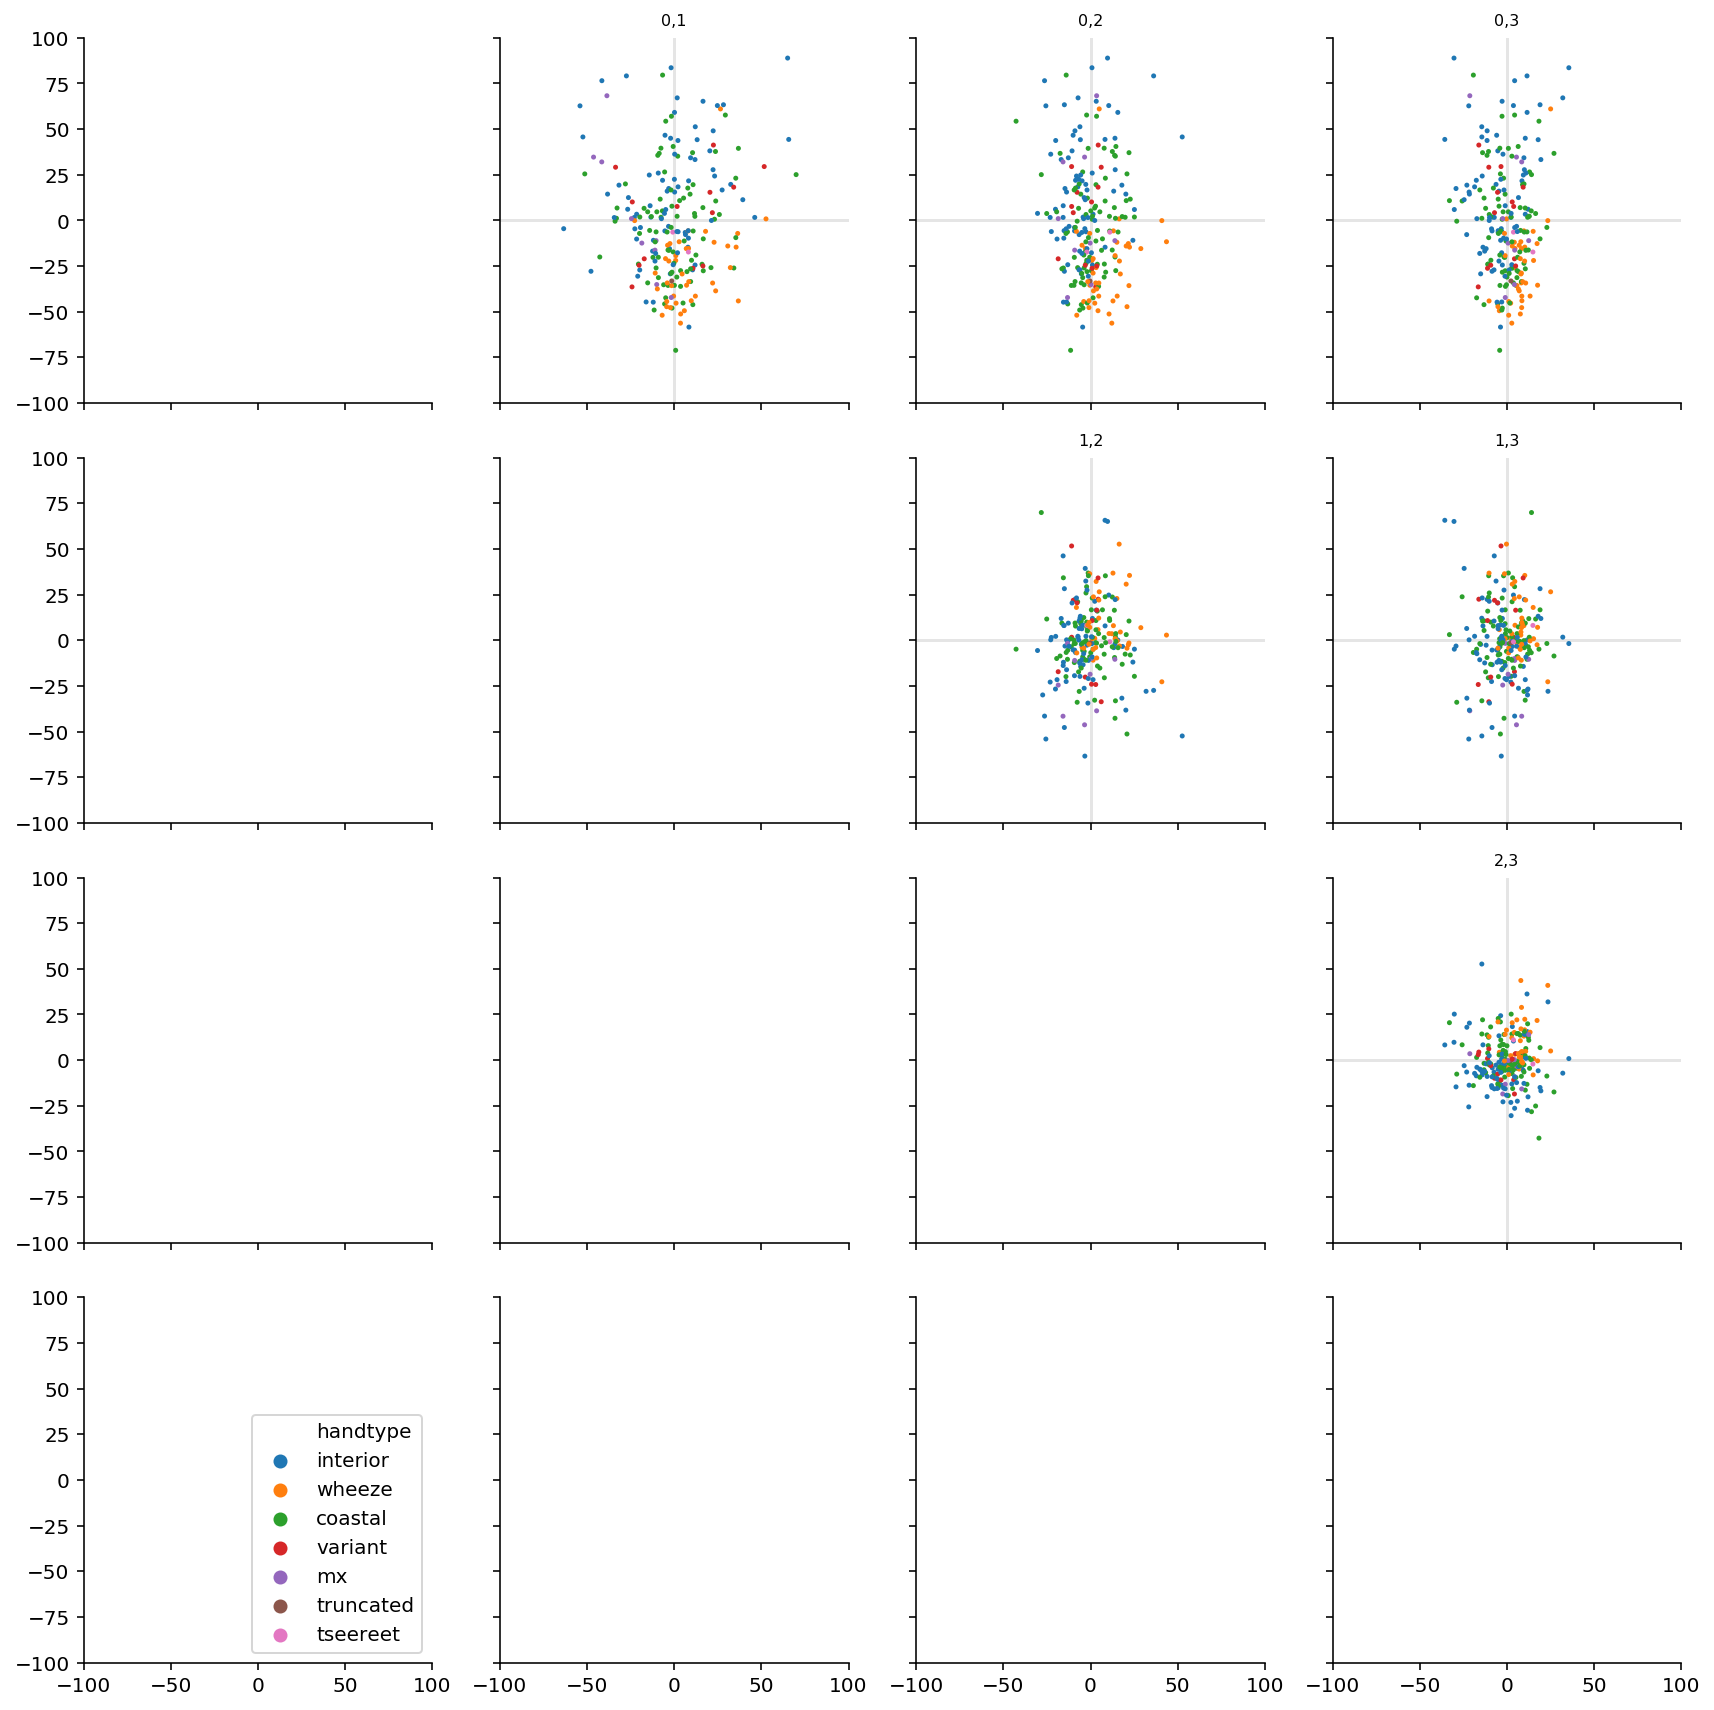

In [ ]:
# feat space
_pca = recs_pca_norm(by=Search.X, out_col='feat_pca', norm=False).fit_recs(spto_a)
# _pca.pca_step_.components_.shape  # = (234, 1500) -- maybe 234 is right?
spto_a_pca_feat = (_pca.transform_recs(spto_a)
    [['species', 'feat_pca']]
    .join(how='left', other=load_xc_handtype()).pipe(df_col_map, handtype=lambda x: x[0].rstrip('?'))
    .pipe(df_map_rows, lambda row: row.append(pd.Series({
        'x%s' % i: x
        for i, x in enumerate(row.feat_pca)
    })))
    .drop(columns=['feat_pca'])
    # .pipe(df_inspect, lambda df: (df.shape, df[:10]))
)
plot_all_projections(
    spto_a_pca_feat,
    xlim=(-100, 100),
    ylim=(-100, 100),
    ndims=4,
    ncols=4, nrows=4,
    dim_name='x%s',
    hue='handtype',
    palette='tab10',
    s=25,
    # diag_hack=True,  # Breaks on some cats with few datapoints
)

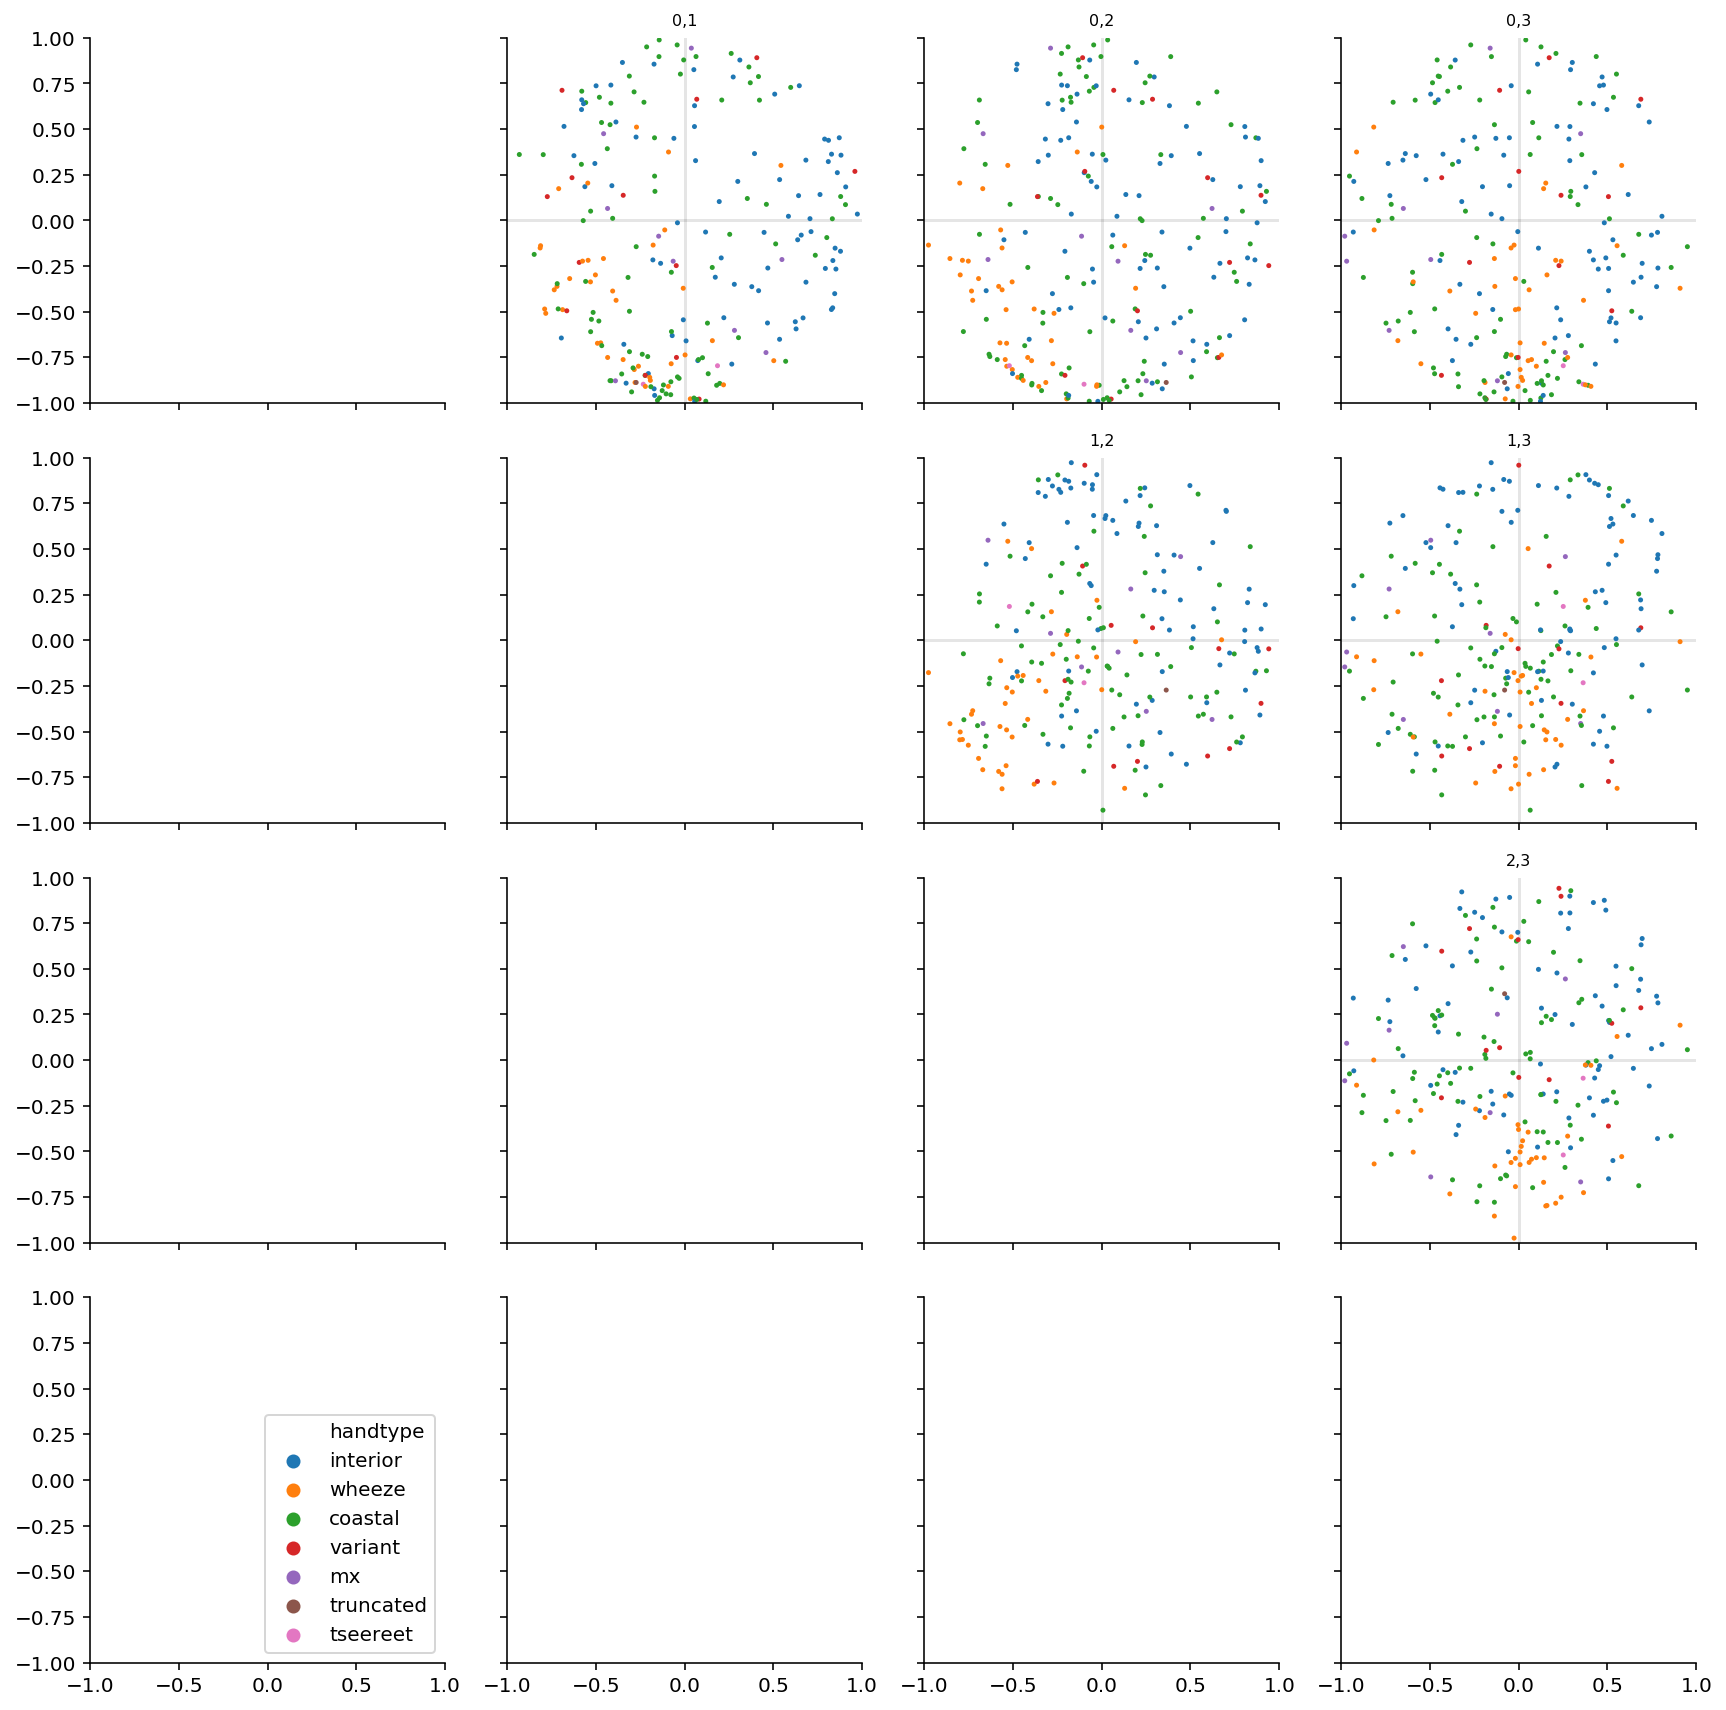

In [ ]:
# proba space
n_components = 4
_pca = recs_pca_norm(
    by=search.species_proba,
    out_col='proba_pca',
    n_components=n_components,
    # norm=False,  # [Why do all the plots look the same with norm=False?]
).fit_recs(spto_a)
spto_a_pca = (_pca.transform_recs(spto_a)
    [['species', 'proba_pca']]
    .join(how='left', other=load_xc_handtype()).pipe(df_col_map, handtype=lambda x: x[0].rstrip('?'))
    .pipe(df_map_rows, lambda row: row.append(pd.Series({
        'x%s' % i: x
        for i, x in enumerate(row.proba_pca)
    })))
    .drop(columns=['proba_pca'])
    # .pipe(df_inspect, lambda df: (df.shape, df[:3]))
)
plot_all_projections(
    spto_a_pca,
    # xlim=(-.2, .2),
    # ylim=(-.2, .2),
    ndims=n_components,
    ncols=4, nrows=4,
    dim_name='x%s',
    hue='handtype',
    palette='tab10',
    s=25,
    # diag_hack=True,  # Breaks on some cats with few datapoints
)